# Data Science Project SoSe 2024
## Team 07
- Maximilian Hoffmann
- Kilian Kempf
- Daniel Schneider
- Tom Schuck

## Project Submission

## Notebook content

- Data Initialization
- Data Analysis
- Feature Engineering
- Feature Analysis
- Model Training
- Accuracy Prediction
- Tip Prediction

In [1]:
import os

import pandas as pd

from data_management import DataManager

## Data Initialization
To ensure that all tasks like the analysis and the feature engineering are conducted on the same, consistent dataset, a custom data manager class has been created. The data manager provides methods, that are needed and can be re-used in multiple tasks (e.g. retrieval of orders with tip information for the training dataset). Since the data management functionality is encapsulated in the data manager, the room for errors caused by redundant implementations is reduced and the code is more maintainable, because methods can be adjusted in a single location.

In [2]:
DATA_DIR = os.path.join(os.getcwd(), 'data/Instacart')

op_prior = pd.read_csv(os.path.join(DATA_DIR, 'order_products__prior.csv.zip'))
op_train = pd.read_csv(os.path.join(DATA_DIR, 'order_products__train.csv.zip'))

tip_train = pd.read_csv(os.path.join(DATA_DIR, 'tip_trainingsdaten1_.csv'))[['order_id', 'tip']]
tip_test = pd.read_csv(os.path.join(DATA_DIR, 'tip_testdaten1_template.csv'))

orders = pd.read_csv(os.path.join(DATA_DIR, 'orders.csv.zip'))
aisles = pd.read_csv(os.path.join(DATA_DIR, 'aisles.csv.zip'))
departments = pd.read_csv(os.path.join(DATA_DIR, 'departments.csv.zip'))
products = pd.read_csv(os.path.join(DATA_DIR, 'products.csv.zip'))

data_manager = DataManager(op_prior, op_train, tip_train, tip_test, orders, products, aisles, departments)

## Data Analysis
Several analysis were done to find any tip patterns in the data. The purpose of this analysis is to find specific features that are relevant for the prediction of tip. To find out which attributes have a significant influence on the tip, several analysis tasks were executed.

In [3]:
from analysis import ReorderedAnalysis, ProductCartOrder, GeneralFacts, DayOfWeek, HourOfDay, Department, Aisle, \
    Product, OrderNumber, GeneralAnalysis, NumberOrderUser, DaysSincePriorOrder, AssocRules

##### **General Analysis**
**Analysis:** The general analysis task was created to get an overview of the data set and to find out general facts about the dataset and its data. Typical functions like the mean, median, standard deviation, min and max values were calculated for the different entities. The purpose of this analysis task was to get a first impression of the data set and to find out if there are any irregularities or outliers in the data. The datatypes of the different attributes were checked, and the number of missing values was calculated.

**Result Interpretations:** 
- The dataset mostly contains numerical attributes with three categorical attributes, namely product_name, aisle, and department.
- The dataset is rather large with 32 million rows and 16 columns.
- The dataset contains some missing values in the columns "days_since_prior_order" and some in "tip". The missing "tip" values are limited to the test data.


In [ ]:
general_analysis = GeneralAnalysis(data_manager)
general_analysis.execute_analysis()

##### **General Facts**
**Analysis:** For data understanding and getting familiar with the data set and the overall relations between the main entities, some general facts about the dataset were collected. Therefore several facts has been calculated containing the different entities and there relations.

**Result Interpretations:** The results are important to clarify weather the calculations fit with the overall facts of the dataset and do not contain any calculation errors or changed the dataset.

In [ ]:
general_facts = GeneralFacts(data_manager)
general_facts.execute_analysis()

##### **Day of the Week Analysis**
**Analysis:** The analysis was conducted to find out whether the day of the week has an impact on the tip probability. To find out if there is a connection between the day of the week and the tipping behaviour, 2 plots were created.
- Left plot: The left plot shows the absolute number of orders that were tipped and not tipped depending on the day of the week on which the order was placed as a bar chart with overlapping bars. This was done to get an overview of how the orders are distributed over the days of the week, to put the tip probability into perspective.
- Right plot: The plot on the right shows the probability that an order was tipped depending on the day of the week on which the order was placed. The tip probability was calculated by dividing the number of tipped orders by the total number of orders for each day of the week.

**Result Interpretation:**
The right plot shows that the tip probability is significantly higher on day 0 and 1 (probably Saturday and Sunday) than on the other days of the week. While the tip probability is relatively constant on the other days of the week at or below 40%, the tip probability on day 0 and 1 is above 50%.

&rarr; **Impact of order_dow**: The feature **dow_high_tip_probability**, which one-hot encodes whether the order was placed on the days on saturday/sunday or not, was created to capture this relationship. This was necessary, because the order_dow is an ordinal-scaled variable, which cannot be used directly in most models (e.g. logistic regression).


In [ ]:
day_of_week = DayOfWeek(data_manager)
day_of_week.execute_analysis()

##### **Hour of the Day Analysis**
**Analysis:** The analysis was conducted to find out whether the hour of the day, in which the order has been placed, has an impact on the probability that the order is tipped. To find out if there is a connection, the same plots were created as in the day of the week analysis, only this time with the hour of the day.

**Result Interpretation:**
The right plot shows that the tip probability is significantly higher in the early morning and in the evening than during the day. The period in the early morning, where the tip probability is higher, includes the hours 0-4 (from 12 until 5 a.m.). At hour 5 a significant drop in the tip probability can be observed. The tip probability remains relatively constant during the day with a slight increase in the morning hours. Since the change in the tip probability is not as drastic as in the early morning and doesn't reach the same level as in the early morning or the evening, this increase is not considered significant. At hour 19, the tip probability increases abruptly and remains at a high level until hour 23 (7 p.m. until 12 a.m.). Therefore, the hours 0-4 and 19-23 are considered as the hours with a high tip probability.

In the left plot, it can be observed that the number of placed orders is distributed very unevenly over the hours of the day. In the hours with a high tip probability, the number of orders is significantly lower than during the day. This is particularly noticeable in the early morning hours, where the number of orders is very low. Therefore, the significant increase in the tip probability in the early morning hours is not as relevant as the increase in the evening, where the number of orders is higher. Despite this fact, no differentiation was made between the early morning and the evening, for simplicity reasons and since the tip probability is very similar in both periods, which cover a continuous time span (7 p.m. until 5 a.m.) when combined.

&rarr; **Impact of order_dow**: The feature **hod_high_tip_probability**, which one-hot encodes whether the order was placed in the hours with a high tip probability (0-4 and 19-23) or not, was created to capture this relationship. This is necessary because the order_hour_of_day is also an ordinal-scaled variable.

In [ ]:
hour_of_day = HourOfDay(data_manager)
hour_of_day.execute_analysis()

##### **Order Number Analysis**
**Analysis:** The analysis of the order number was conducted to find out whether the attribute has an impact on the tip probability. Again, the same plots were created as in the day of the week analysis, only this time with the order number. To better visualize the relationship, a line graph was chosen to show the tip probability in dependence of the order number, instead of a bar plot.

**Result Interpretation:**
The right plot shows that the probability that an order is tipped increases with a rising order number up until around the 40th order. After that, the tip probability decreases again. In the graph one can clearly see that the curve is not linear, but rather resembles the shape of a quadratic function.

The left plot shows a decreasing number of orders with a rising order number. This was expected due to the fact, that the order number is a user-specific attribute and there are more users with a shorter order history than with a longer order history. Therefore, an order with a larger order number is less likely to appear. This also reduces the significance of the tip probability in the right plot for higher order numbers, because the number of orders is very low. However, this is not encoded explicitly in the feature, but will be left to the model to learn an appropriate weight.

&rarr; **Impact of order_number**: The feature **order_number_squared** was created, which contains the squared order number. This feature was created to allow linear models to capture the quadratic relationship between the order number and the tip probability, when combined with the original order number feature.


In [ ]:
order_number = OrderNumber(data_manager)
order_number.execute_analysis()

##### **Days Since Prior Order Analysis**

**Analysis:** The analysis was conducted to find out whether the days since the prior order has an impact on the tip probability. To find out if there is a connection, the same plots were created as in the analysis of the order number, only this time with the days since the prior order.

**Result Interpretation:**
The right plot shows that the tip probability is growing the longer the user waits between two orders until the peak is reached at 7 days since the user placed an order. After the 7th day, the tip probability decreases more or less constantly with some peaks at the 14th, 21st and 28th day since the user placed his/her last order. The lowest tip probability is reached at the 30th day since the user placed his/her last order. That the highest tip probability is reached at the 7th day since the user placed his/her last order could be explained that user order items, which they especially like on a weekly basis and therefore tip more often. This also explains the little peaks at the 14th, 21st and 28th day since the user placed his/her last order, when users order some items regularly every 2, 3 or 4 weeks.

The right plot supports this assumption as there are more orders that are placed with the aforementioned values for the days since the prior order compared to the other values. A local maximum can be observed at 7 days since prior order with some smaller peaks at 14, 21 and 28 days since prior order.
The global maximum can be observed at 30 days since prior order, which is the most frequent value for the days since prior order. One possible explanation for this unusual peak could be that there is a kind of subscription model, where items are ordered automatically every 30 days. This would explain the high number of orders at 30 days since prior order and the low tip probability, because the user did not actively place the order.
The more likely explanation is that 30 is used as value for the days since prior order, when the user has not placed an order for a long time and the actual days since prior order is unknown or larger than 30. This is also supported by the general analysis, which shows, that 30 is the maximum value for the days since prior order. The low tip probability  could then be explained, that users, who order very rarely are less likely to tip.

&rarr; **Impact of days_since_prior_order**: The feature **days_since_prior_order** was kept in the feature set, since it has a significant impact on the tip probability.

In [ ]:
days_since_prior_order = DaysSincePriorOrder(data_manager)
days_since_prior_order.execute_analysis()

##### **Department Analysis**
**Analysis:** The analysis of the department was conducted to find out whether orders containing products from a specific department have a higher tip probability than others. The same 2 plots were used to visualize, on one hand, the absolute number of tipped and not tipped orders containing products from a specific department and on the other hand the tip probability of orders containing products from a specific department.

**Result Interpretation:** The right plot shows that the tip probability of orders containing products from the alcohol department is significantly higher than the tip probability of orders containing products from other departments. Even though the tip probability of orders containing products from the other departments is not constant, the differences between the departments are not as significant as the difference between the alcohol department and the other departments.

The left plot shows that the number of orders containing products from the alcohol department is rather low compared to the other departments. But since the difference in the tip probability is so striking, it was decided to create a feature which encodes this relationship anyway.

&rarr; **Impact of department**: The feature **contains_alcohol** was created, which one-hot encodes whether the order contains at least 1 product from the alcohol department or not. This feature was created to capture the significant difference in the tip probability of orders containing products from the alcohol department compared to orders containing products from other departments, without one-hot-encoding all departments. This would have resulted in 21 additional features (1 for every department), which would have lead to a very sparse feature matrix and would have made the model more complex. Additionally, the feature **dept_tip_rate**, which is described in the feature analysis section, was created to capture the relationship between the tip probability and the departments in a more generic and dense way.

In [ ]:
departments = Department(data_manager)
departments.execute_analysis()

##### **Aisle Analysis**
**Analysis:** The analysis of the aisle was conducted to find out whether orders containing products from a specific aisle have a higher tip probability than others. For this analysis, a single plot was created, which shows the tip probability of orders containing products from a specific aisle. In addition to that, aisles belonging to the alcohol department were highlighted.

**Result Interpretation:** The plot reveals that orders including items from the alcohol aisles have a notably higher likelihood of receiving tips compared to orders that contain items from other aisles. While the tip probability for non-alcohol aisles varies, none exhibit a distinctly higher likelihood of tipping, unlike the alcohol aisles. Generally, there is a mild fluctuation in tip probability across these other aisles, with some slightly higher and others lower, but these variations are not as pronounced as those observed for the alcohol aisles.

&rarr; **Impact of aisle**: The analysis did not reveal any significant relationship between a specific aisle, other than the alcohol aisles, which are already encoded in the **contains_alcohol** feature. Therefore, no feature was created to capture the relationship between the tip probability and a specific aisle. One-hot-encoding all 134 aisles would also not be an option. Instead, **aisles_tip_rate** was created, which is described further in the feature analysis section and encodes the fluctuation of the tip probability across all aisles in a more generic and dense way.

In [ ]:
aisles = Aisle(data_manager)
aisles.execute_analysis()

##### **Product Analysis**
**Analysis:** The analysis of the product was conducted to find out whether specific products have a higher tip probability than others. For this analysis, multiple plots and tables were created to visualize the tip probability of the products:

- First plot: The first plot visualizes the distribution of products depending on the probability, that orders containing these products are tipped. The products are grouped into 100 bins, which means that every bin contains products with a tip probability between 0 and 0.01, 0.01 and 0.02, and so on. The plot shows the number of products in each bin.
- Second plot: The second plot visualizes the same distribution, but this time the products were weighted by how often they were ordered. This was done to judge the significance of the tip probability of the products. The plot shows the number of orders containing products in each bin.

- Third plot: The third plot displays the same distribution of products as the first plot, but in a more fine grained way. Only products with a tip probability between 80% and 100% are shown, grouped into 20 bins.
- Fourth plot: The fourth plot visualizes the same distribution as the third plot, but the products were weighted by how often they were ordered.
- Table 1: The table shows products with a 100% tip probability, that don't belong to the alcohol department, sorted by the number of orders containing these products.

- Fifth plot: The fifth plot is equivalent to the third plot, but only products with a tip probability between 0% and 20% are shown, grouped into 20 bins.
- Sixth plot: The sixth plot is equivalent to the fifth plot, but the products were weighted by how often they were ordered.
- Table 2: The table shows products with a 0% tip probability, sorted by the number of orders containing these products.
- Last plot: The last plot shows the distribution of products with a tip probability of 0% depending on the number of orders containing these products.

In all plots, products from the alcohol department are highlighted.

**Result Interpretation:**
When looking at the first and the second plot, one can see, that the tip probability varies between different products. The distribution of the tip probability of the products is not uniform, but rather resembles a normal distribution, except there are noticeable peaks at 0% and 100%. Once the products are weighted by how often they were ordered, the peaks at 0% and 100% disappear and the distribution becomes more uniform. This leads to the conclusion that these products are not ordered very often and therefore the tip probability is not very significant. Only a small elevation can be observed starting at around 80% tip probability, which indicates that there are some products with a high tip probability, that are ordered more often than others.

In the third and forth plot, this is examined in more detail. The unweighted plot on the left shows that there are many products, which do not belong to the alcohol department and have a tip probability between 80% and 100%. There is also a large peak of products, that are tipped every time they are ordered. However, when looking at the weighted plot on the right, this peak shrinks drastically. It also becomes clear that the alcohol products are extremely dominant in this area and that the other products are not ordered very often, when looking at the weighted plot. This leads to the conclusion that the tip probability of the alcohol products is rather significant, while the tip probability of the other products is not. The table 1 confirms this, as it shows that the products, which do not belong to the alcohol department and have a 100% tip probability, appear in 7 orders at most. When considering that in the dataset as a whole, products are ordered an average of 653 times, with a median order frequency of 60 times, it becomes clear that the non-alcohol products with a 100% tip probability are not very significant. Therefore, a feature using a curated list of products that are tipped every time (or above 80%) would not be very useful, since most of these products are alcohol products or are not ordered very often.

A similar observation can be made for the products with a tip probability between 0% and 20%. The unweighted plot on the left shows that there are many products with a low tip probability with a significant peak at 0%. But when looking at the weighted plot on the right, it becomes clear that these products are also not ordered very often, as the peak at 0% shrinks drastically. Table 2 shows, that the products with a 0% tip probability are ordered 22 times at most, which is more significant than the products with a 100% tip probability, but still low. The last plot gives a more detailed view of the distribution of the products with a 0% tip probability. It shows that the products with a 0% tip probability are ordered very rarely, with the majority of them being ordered only 3 times. Not many of these products are ordered more than 10 times. Therefore, a feature using a curated list of products that are never tipped would also not be very useful.

&rarr; **Impact of product**: The analysis showed that products that are always/never tipped are not very significant, since they are not ordered very often. Therefore, no feature was created to capture the relationship between the tip probability and a curated list of products that are always/never tipped. To allow the model to utilize the information that some products are more likely to be tipped than others, which is clearly visible in the first/second plot, the generic feature **product_tip_rate** was created, which is described further in the feature analysis section.

In [ ]:
products = Product(data_manager)
products.execute_analysis()

##### **Add to cart order analysis per Product**
**Analysis:** To find out whether the add to cart order of a specific product has an impact on the tip probability of that product, an analysis task has been created which calculates the tip probability of the products in dependence of the add_to_cart_order. To compare the "add to cart order" of a product, the rational scaled variable (add_to_cart_order) has to be normalized. With that normalization every "add to cart order" is transformed to an additional normalized_add_to_cart attribute order within the interval [0,1]. After the calculation of the normalized attribute, the variable has been subdivided in 10 bins. Within these bins the mean tip probability of every product is calculated and visualized within the box plot below.

**Result Interpretations:** The boxplot below shows the distribution of the product specific tip probabilities in dependence of the normalized "add to cart order". It displays the median, potential outliers and the area between the 25th and the 75th quartile which represents 50% of the data. Considering the area between the 25th and 75th quartile, it can be recognized that there is no overall impact of the normalized add_to_cart_order on the product specific tip probability. Focussing the outliers, it can be seen that there are some differences between the different bins. However, because the range between the 25th and 75th percentile is so constant, it can be assumed that these outliers are not necessarily related to "add to card or" but are due to other influences.\
&rarr; **No overall impact of add_to_cart_order on the tip probability of the products** &rarr; no feature crafted and no further analysis on the attribute "add_to_cart_order"

In [ ]:
product_cart_order = ProductCartOrder(data_manager)
product_cart_order.execute_analysis()

##### **Reordered tip probability analysis per Product**
**Analysis:** To find out weather the amount of reorders has an influence on the tip probability of a product, an analysis has been done which compares the product specific tip probability in dependence of the product reordered probability. Because of the fact that the "reordered" attribute is a user specific flag, the calculated product reordered rate describes the probability that a product is reordered. With a high reordered rate we can assume that the product has been bought quite often across all users. The heatmap below shows the product tip probability in comparison to the reordered rate. The purpose of this analysis task was to identify weather the reordered rate has an overall influence of the tip probability. The assumption here was that the tip probability of the products generally increases with a rising reordered rate.

**Result Interpretations:** The heatmap overall shows that there is no general connection between the reordered rate and the product specific tip probability. As the reordered rate increases, the product tip probability of the products remains relatively constant and does not change depending on the reordered rate.\
&rarr; **No overall impact of reordered rate on the tip probability of the products** &rarr; no feature crafted

In [ ]:
reordered_tip_rate = ReorderedAnalysis(data_manager)
reordered_tip_rate.execute_analysis()

##### **Total Number of Orders per User**
**Analysis:** To find out weather the total number of orders per user has an influence on the tip probability, an analysis has been done which compares the tip probability in dependence on the total number of orders per user. The purpose of this analysis task was to identify weather the total number of orders per user has an overall influence on the tip probability. 
For the analysis, the total number of orders per user has been calculated and the tip probability has been calculated for every user. The tip probability has been calculated by dividing the number of tipped orders by the total number of orders of the user. The tip probability has been calculated for every user, and the mean tip probability has been calculated for every number of orders per user. The results are visualized in the line plot below.

**Result Interpretations:** The line plot below shows that the tip probability of the users increases constantly with the number of total orders per user until it reaches a ceiling at around 50 orders per user. After that the tip probability starts a slight downward trend which is rather unstable. To note is that the most data points are located in the range of 0 to 50 orders per user.
This analysis shows that the number of orders per user has a significant impact on the tip probability and should be considered as a feature.
Because there is already the feature "order_number" which captures the order number of the specific order, we decided that it might duplicate the information if we add the number of total orders per user as a feature. \
&rarr; **An impact on the tip probability by the total number of orders per user was detected** &rarr; no feature crafted because of the duplication of information through the feature "order_number"


In [ ]:
num_order_user = NumberOrderUser(data_manager)
num_order_user.execute_analysis()

##### **Analysis based on Association Rules**
**Analysis:** To find out whether association rules mining can be leveraged to predict the tip probability, an analysis has been done. Association rules are mined based on the FP-growth algorithm. For this, all orders across all users are used. The association rules are mined in a way such that the departments contained in an order represent a transaction. Additionally, a tip indicator is included in the transaction when the corresponding order was tipped. Then, the mined association rules are filtered such that the tip indicator is contained solely on the right-hand side and the corresponding departments are contained on the left-hand side of an association rule. For example, {produce, alcohol, snacks} -> {tip_indicator} with support = 5% and confidence = 65% could be a possible mined association rule. In this case, the confidence of an association rule corresponds to the tip probability given the departments contained on the right-hand side of the association rule.

**Result Interpretations:** The left plot shows that most mined association rules have a rather low support. For our case, a rather low support is sufficient, since we only want to predict the tip probability (i.e. confidence). The right plot shows that the confidence of the mined association rules follow a bimodal distribution. While for most association rules the tip probability (i.e. confidence) is between 0.3 and 0.5, there are also some rules with a tip probability (i.e. confidence) between 0.7 and 0.8.\
&rarr; **A potential impact on the tip probability by the association rules was detected** &rarr; feature **tip_rate_assoc_rules_depts** crafted for further investigation of a practical usage for our task

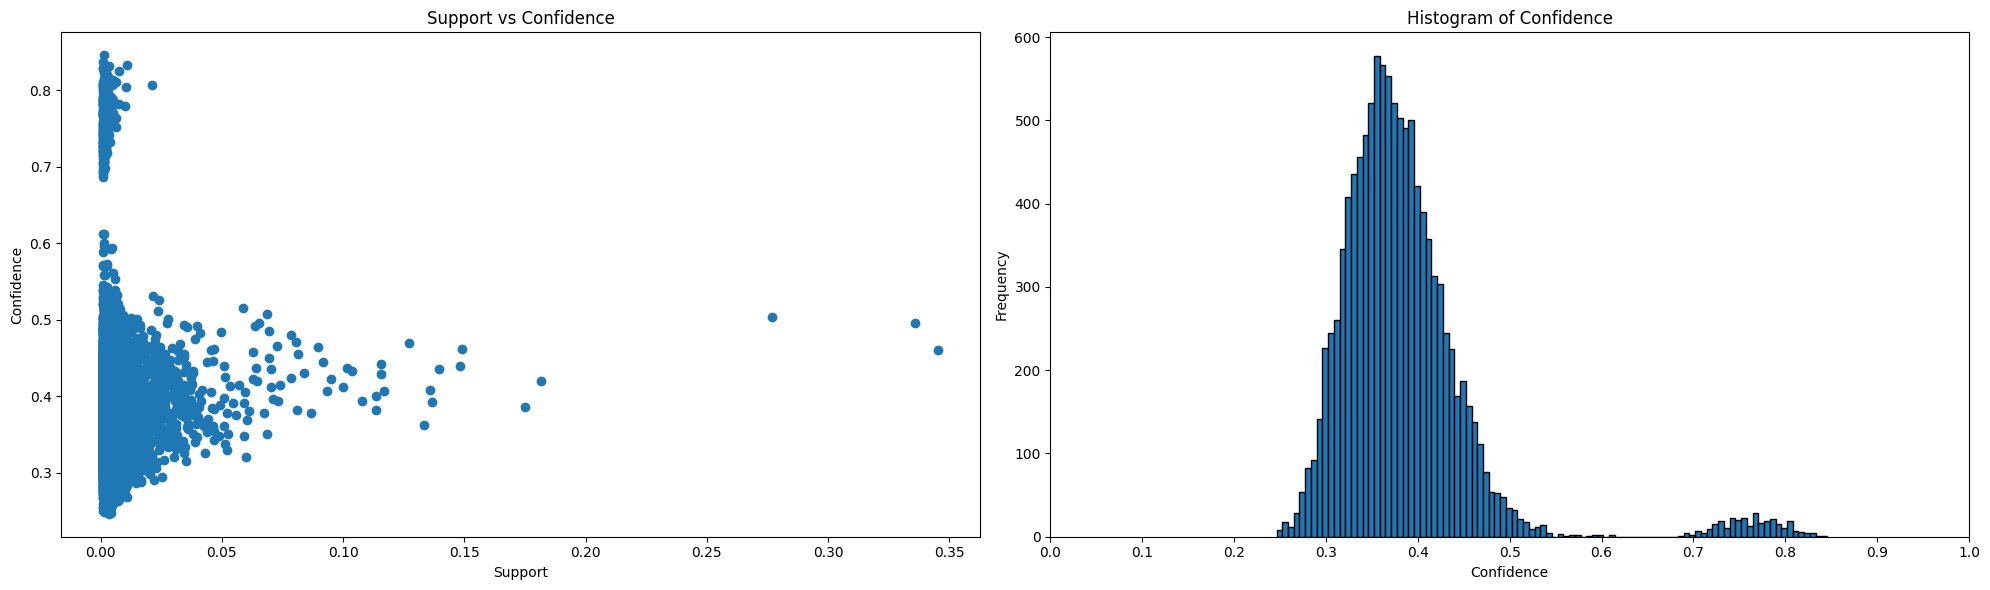

In [8]:
assoc_rules = AssocRules(data_manager)
assoc_rules.execute_analysis()

## Feature Engineering
With the results of the general analysis task and our specific assumptions of any relation between tip and various data combinations, a few features were build that we think will make a potential impact. The explanation of each feature and corresponding impact analysis will be covered in the next chapter (Feature analysis). To execute the impact analysis of the features, it is necessary to compute them all before.

For the computation of the features, it is distinguished between two types of features:
- **Static features:** Features that are calculated user specific and consider just the orders the respective user has placed so far (future orders are never considered). These features can be computed once and do not need to be recalculated for a newly created fold in a time series cross validation.
- **Dynamic features:** Features that aggregate cross-user information like the product tip rate of all orders. For these features we use to data of the whole dataset or fold in cross validation. Therefore, the dynamic features need to be recalculated for every new fold in the cross validation, so that the model does not get any information about the future.

In [4]:
from feature_engineering.static_features import ContainsAlcohol, DowHighTipProbability, TipHistory, OrderSize, \
    OrderNumberSquared, PrevOrderTipped, MeanOrderedRate, CustomerLifetime, ReorderedRatio, OrderFrequency, \
    HodHighTipProbability, PrevTippedProductsRatio, RelDaysSinceTip, DaysSinceTip, LastTipSequence, AvgSizePrevOrders, \
    SimOrdersTipRatio
from feature_engineering.dynamic_features import ProductTipRate, DepartmentTipRate, AisleTipRate, AssocRulesDepartments

In [5]:
# Static Features
tip_history = TipHistory()
reordered_rate = ReorderedRatio()
order_size = OrderSize()
prev_tipped_products_ratio = PrevTippedProductsRatio()
customer_lifetime = CustomerLifetime()
prev_order_tipped = PrevOrderTipped()
order_frequency = OrderFrequency()
mean_ordered_rate = MeanOrderedRate()
rel_days_since_tip = RelDaysSinceTip()
days_since_tip = DaysSinceTip()
sim_orders_tip_ratio = SimOrdersTipRatio()
product_tip_rate = ProductTipRate()
order_number_squared = OrderNumberSquared()
hod_high_tip_probability = HodHighTipProbability()
dow_high_tip_probability = DowHighTipProbability()
contains_alcohol = ContainsAlcohol()
avg_size_prev_orders = AvgSizePrevOrders()

# Dynamic Features
department_tip_rate = DepartmentTipRate()
aisle_tip_rate = AisleTipRate()
last_tip_sequence = LastTipSequence()
assoc_rules_departments = AssocRulesDepartments()

In [6]:
# Static Features
data_manager.register_feature(tip_history)
data_manager.register_feature(reordered_rate)
data_manager.register_feature(order_size)
data_manager.register_feature(customer_lifetime)
data_manager.register_feature(prev_order_tipped)
data_manager.register_feature(prev_tipped_products_ratio)
data_manager.register_feature(order_frequency)
data_manager.register_feature(sim_orders_tip_ratio)
data_manager.register_feature(mean_ordered_rate)
data_manager.register_feature(last_tip_sequence)
data_manager.register_feature(rel_days_since_tip)
data_manager.register_feature(days_since_tip)
data_manager.register_feature(order_number_squared)
data_manager.register_feature(hod_high_tip_probability)
data_manager.register_feature(dow_high_tip_probability)
data_manager.register_feature(contains_alcohol)
data_manager.register_feature(avg_size_prev_orders)

# Dynamic Features
data_manager.register_feature(product_tip_rate)
data_manager.register_feature(department_tip_rate)
data_manager.register_feature(aisle_tip_rate)
data_manager.register_feature(assoc_rules_departments)

Because of the computing time of each feature, the calculation has been done once before and is imported to the local file system. If it is required to compute the features once again, the next two lines of code need to be executed. This will take some time.

In [7]:
# In case a recomputing of the features is necessary. Remove the comments for the next two lines of code.
# data_manager.compute_features()
# data_manager.export_features('data/prepared_data/computed_features.csv.zip', only_static=False)

data_manager.import_features('data/prepared_data/computed_features.csv.zip', only_static=False)

## Feature Analysis
To decide weather a feature will be used in the feature set of the machine learning model, it is necessary to analyze which features have a significant impact on tip. All features that has been computed are described and analyzed in the following section. To analyze the individual features, the correlation is calculated and the relationship to the tip variable is also visualized. To illustrate the distribution of the feature on the tip variable, a density function for the values tip == 1 and tip == 0 is displayed. In addition, the change in tip probability as a function of the feature values is assumed in a second figure. For binary features, only this relationship is shown in a bar chart.


In [8]:
# Dataset for feature analysis
orders_tip_features = data_manager.get_orders_tip_train()

##### **Average size of the previous orders (avg_size_prev_orders)**
**Description:** The feature represents the average size of the previous orders of the user.
For this, the size of the previous orders of the user is calculated and the mean of the sizes is taken. After this the average size of the previous orders is compared to the size of the current order. The feature is calculated by subtracting the average form the current order and dividing it by the average. This leads to a number which represents the deviation of the current order size from the average size of the previous orders.

**Analysis:** The feature has a correlation which is near zero. Furthermore, after the analysis of the feature, it can be seen that the feature has no significant impact on the tip rate.
The consequence of the low correlation and analysis is that the feature is not part of the model feature set.


Correlation between avg_size_prev_orders and tip: -0.013932183862100005


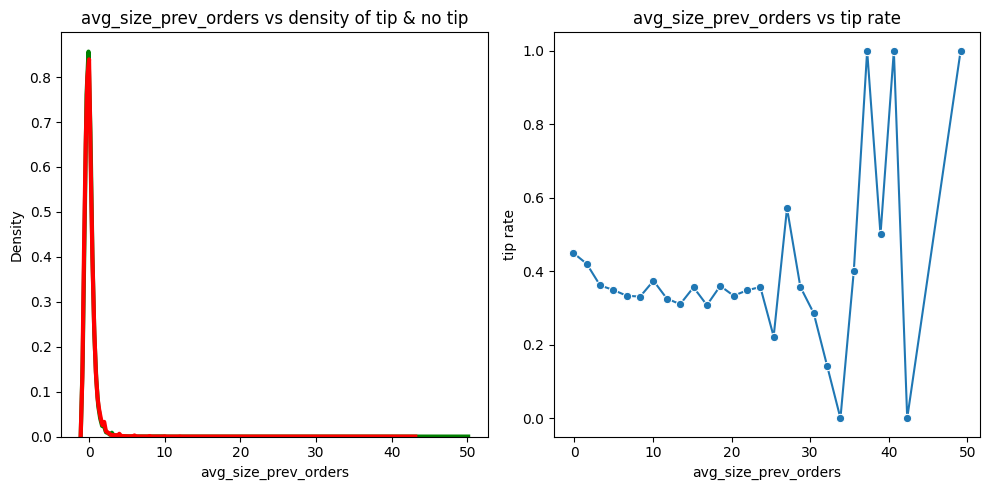

In [9]:
avg_size_prev_orders.analyze_feature(orders_tip_features)

##### **Last Tip Sequence (last_tip_sequence)**
**Description:** The feature represents the sum of the length of the last tip sequence. In case the last order has not been tipped, the feature value is always zero. In case the last order has been tipped, all directly consecutive tipped orders are added to the sequence. A "last_tip_sequence" of five means that the last five orders had all been tipped by the user.

**Analysis:** The feature has a high correlation of 0.33 seem to be very significant for the prediction of tip. The plots demonstrate that there seems to be a connection between the last tipped orders and the tip probability of the current. With a particular look at the last linegraph it can be seen that there is an identifiable relationship between the "last tip sequence" and the "tip probability" of a specific order.

&rarr;**The feature will be included in the model's feature set due to its significant impact on tip probability.**

Correlation between last_tip_sequence and tip: 0.33130003325256746


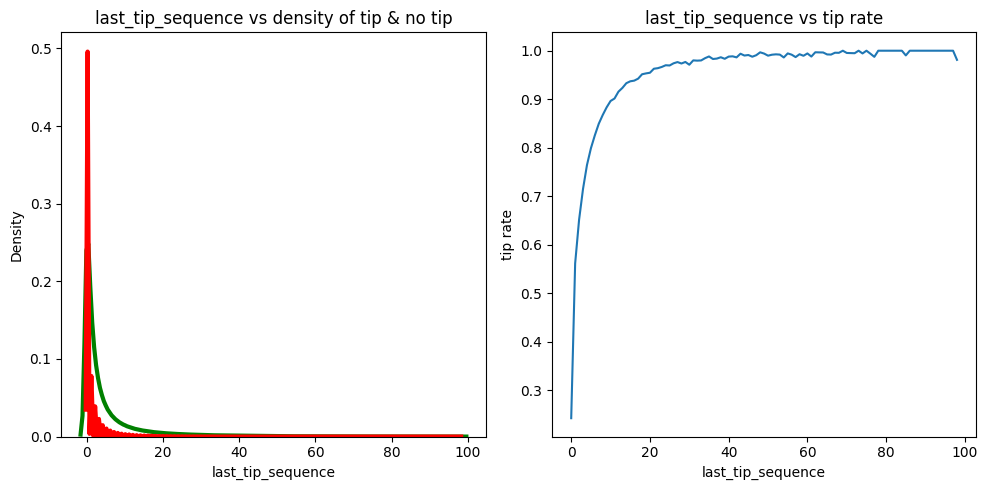

In [10]:
last_tip_sequence.analyze_feature(orders_tip_features)

##### **Tip History (tip_history)**
**Description:** The feature encodes the tipping behaviour of the respective user in previous orders, because the assumption is that the tipping behaviour of the past will be similar in the future. The feature is calculated by dividing the number of previous tipped orders by the number of orders the user has placed so far. The resulting value is between 0 and 1. For example, a value of 0.5 means that the user tipped in 50% of his previous orders.

**Analysis:** The feature has a very high positive correlation of around 0.5591 with the tip variable and is therefore very significant. The line graph on the right side depicts very well that the tip probability consistently increases linearly with the tip history, which indicates that previous tipping behaviour is a very good predictor for future tipping behaviour.

&rarr;**The feature will be included in the model's feature set due to its significant impact on tip probability.**

Correlation between tip_history and tip: 0.5590603293587627


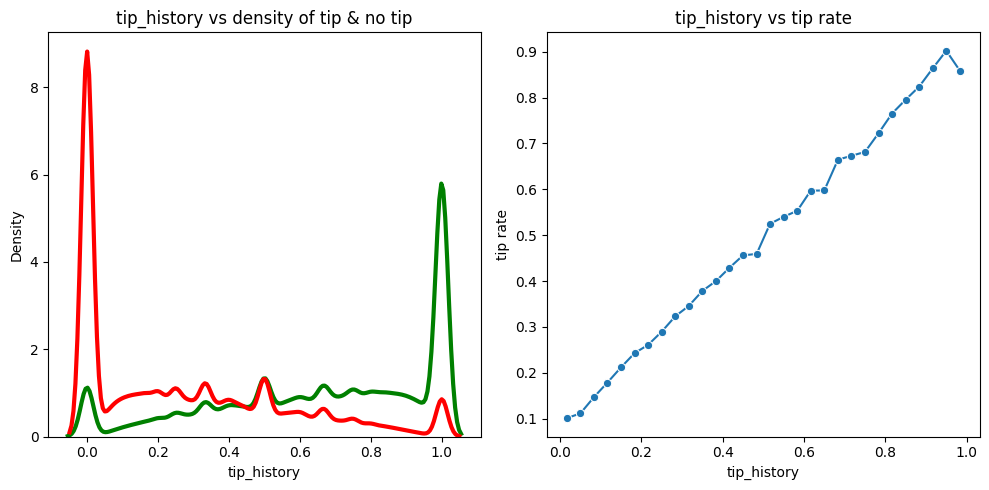

In [11]:
tip_history.analyze_feature(orders_tip_features)

##### **Previous Order Tipped (prev_order_tipped)**
**Description:** The feature encodes whether the previous order of the respective user has been tipped or not. The feature is binary and is 1 if the previous order has been tipped and 0 if not. The assumption was that users who tipped in the previous order are more likely to tip in the current order as well. This feature was created as a more reactive addition to the **tip_history**. For example, when users start to consistently tip after they have placed a few orders, even though they haven't tipped in the beginning (which would not be captured by the **tip_history**). This feature also captures the opposite case, where users tipped in the beginning but stopped tipping after a few orders. This feature is more reactive to changes in the tipping behaviour of the user.
 
**Analysis:** The feature has a high positive correlation of around 0.4904 with the tip variable and is therefore very significant. The bar chart shows that the tip probability is significantly higher at around 70% when the previous order was tipped compared to when the previous order was not tipped, where the tip probability is around 30%, which confirms the assumption that users who tipped in the previous order are more likely to tip in the current order as well. It can be assumed that the feature also captures redundant information, that is already encoded in the **tip_history** feature. Nonetheless, the feature could still be useful as a more reactive addition to the **tip_history** feature.

&rarr;**The feature will be included in the model's feature set due to its significant impact on tip probability.**

Correlation between prev_order_tipped and tip: 0.49037877207308295


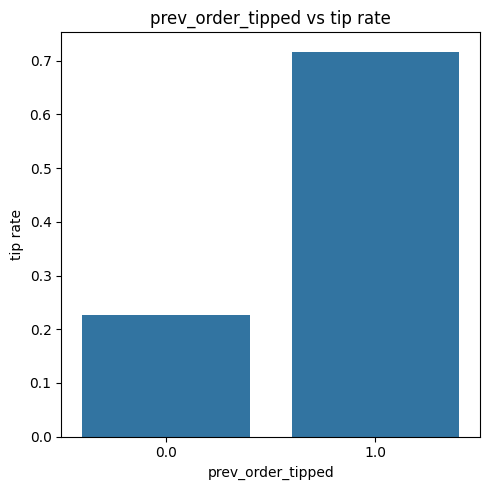

In [12]:
prev_order_tipped.analyze_feature(orders_tip_features)

##### **Order Size (order_size)**
**Description:** The feature represents the size of the order. The size of the order is calculated by counting the number of products in the order. For example, an order with 5 products has an order size of 5.

**Analysis:** The feature has a correlation of around 0.0056 with the tip variable, which is very low and therefore not significant. The little impact of the feature can be seen in the density plot on the left, where the distribution of the order size values is almost identical for tipped and not tipped orders. The line graph on the right shows that the tip probability increases a little bit with the order size until around 10 products and then starts to decrease again. At around 60 products, the tip probability increases again with drastic fluctuations. These fluctuations can be explained by the fact that the number of orders with a size of 60 products and more is very low and makes the tip probability very volatile. This can be seen in the plot on the left again, where the density is nearly zero for orders with a size of 60 products and more.

One could argue that the plot on the right shows a slight quadratic relationship, because of its parabolic form between 0 and 60 orders, which is not captured by the correlation as it measures the linear relationship between 2 variables. But as the increase and decrease are very slight, the computation of an additional quadratic feature would not be justified.

&rarr; **The feature will not be included in the model's feature set due to its low impact on tip probability.**

Correlation between order_size and tip: 0.005591014557457523


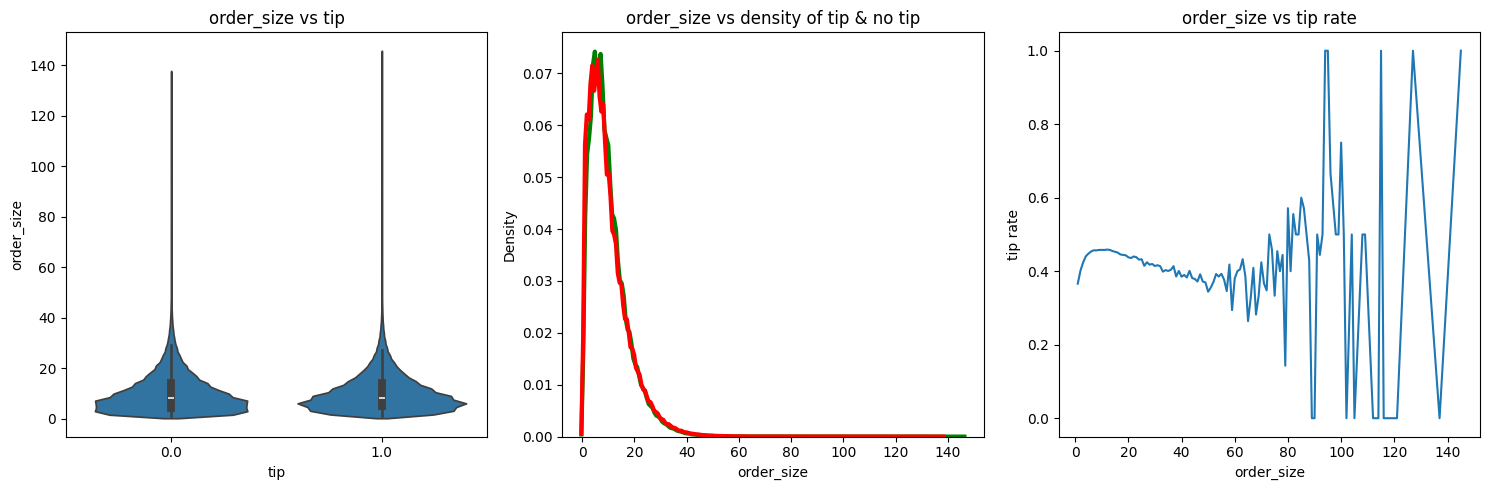

In [15]:
order_size.analyze_feature(orders_tip_features)

##### **Similar tipped and none tipped orders (sim_orders_tip_ratio)**
**Description:** The feature is an indicator of whether similar orders from a user are more likely tipped orders or none tipped orders. The order similarity is calculated based on the product similarity between the current order and every separate previous order. Therefore, every previous order is compared with the current order and has a similarity score in the range of [0,1]. If the previous order has been tipped, the similarity score is positively added to the feature value, but if the previous order has not been tipped, the score is then subtracted from the feature value. With the corresponding weighting via the order_number, the feature receives a value between -1 and 1. A value close to one would mean that similar orders were also tipped whereas a value close to -1 would mean that similar orders has not been tipped.

**Analysis:** The feature has a comparatively high correlation of 0.4118 with the tip variable and therefore appears to have a significant influence. This insight can also be recognized by the plots below. With a particular look at the plot on the right, it can be seen that the tip probability is effected by the feature value. The greatest influence of the feature on the tip probability is in the range of 0.25 to 0.25, the range in which the most data points are available.

&rarr; **It seems that the feature has a not negligible impact on the tip variable. The feature will therefore be included in the model's feature set**

Correlation between sim_orders_tip_ratio and tip: 0.4117836640145189


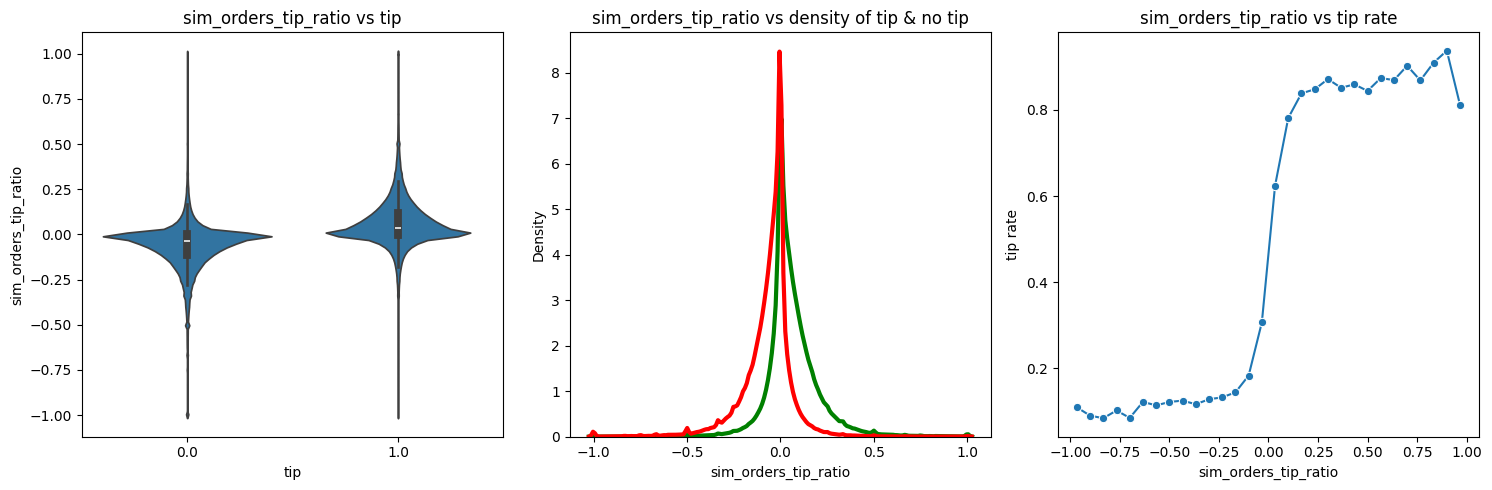

In [16]:
sim_orders_tip_ratio.analyze_feature(orders_tip_features)

##### **Customer Lifetime (customer_lifetime)**
**Description:** The feature represents how long the respective user has been a customer in days. The customer lifetime is calculated by summing up the days since the first order of the user until the current order. For example, a customer who has placed his first order 100 day before the current order, the customer lifetime is 100 days. This feature was created under the assumption that the longer a user is a customer, the more likely he is to tip, because it can be assumed that the user is satisfied with the service if he/she has been a customer for a long time.

**Analysis:** The feature has a correlation of around 0.0779 with the tip variable, which is not very strong. The line graph on the right shows that the tip probability slightly increases with a higher customer lifetime, with a few fluctuations. The plot on the left shows that the increase in the tip probability is encompassed by a decrease in the order density. This reduces the significance of the high tip probabilities a little, but as the density is nowhere near zero, the relationship is still valid. Because the feature has a clear linear relationship, even though it is not very strong, it was decided to include it in the model's feature set, even though the impact probably won't be very large.

&rarr; **The feature will be included in the model's feature set due to its slight impact on tip probability.**

Correlation between customer_lifetime and tip: 0.07792749087601082


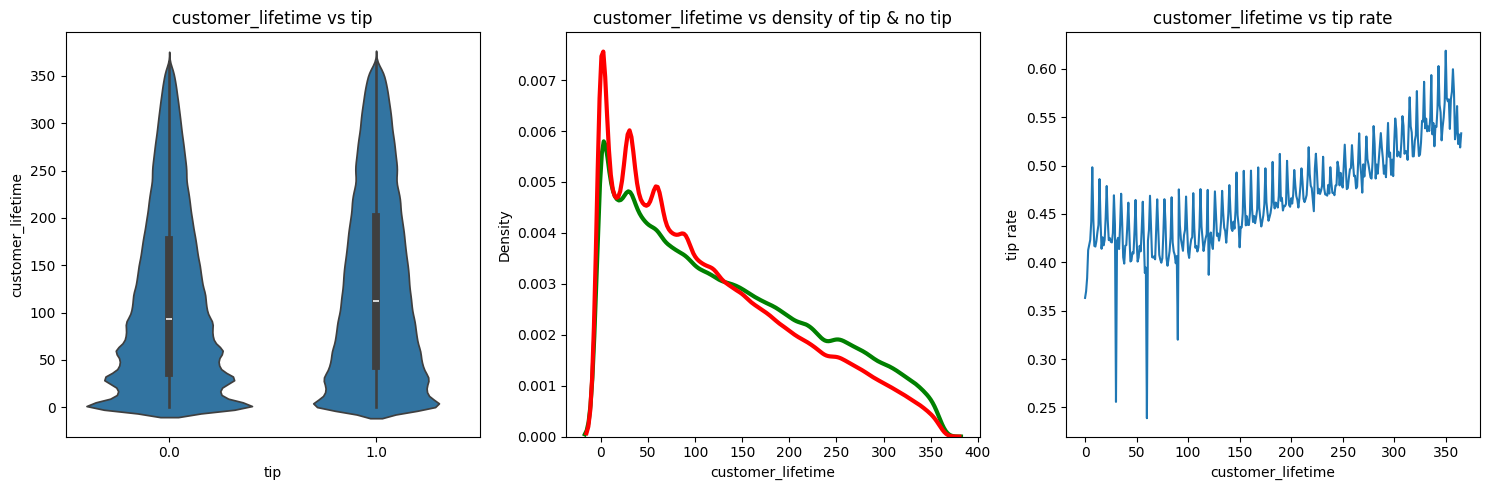

In [17]:
customer_lifetime.analyze_feature(orders_tip_features)

##### **Reordered Ratio (reordered_ratio)**
**Description:** The feature represents the ratio of products in the order are reorders. The reordered ratio is calculated by dividing the number of reordered products in the order by the total number of products in the order. For example, a reordered ratio of 0.5 means that 50% of the products in the order are reorders. The feature was crafted under the assumption, that a user is more likely to tip if the user orders products he/she already knows and likes again.

**Analysis:** The feature has a correlation of around 0.1161, which is moderate/low. The plot on the right side shows that the tip probability more steadily increases with the reordered ratio from around 30% to above 50% (except in the beginning and in the end). Therefore, a larger portion of the products, which are reorders in the order, increases the likelihood of tipping. Due to its moderate impact on tip probability, the feature will be included in the model's feature set.

&rarr; **The feature will be included in the model's feature set due to its moderate impact on tip probability.**

Correlation between reordered_ratio and tip: 0.11609894888373064


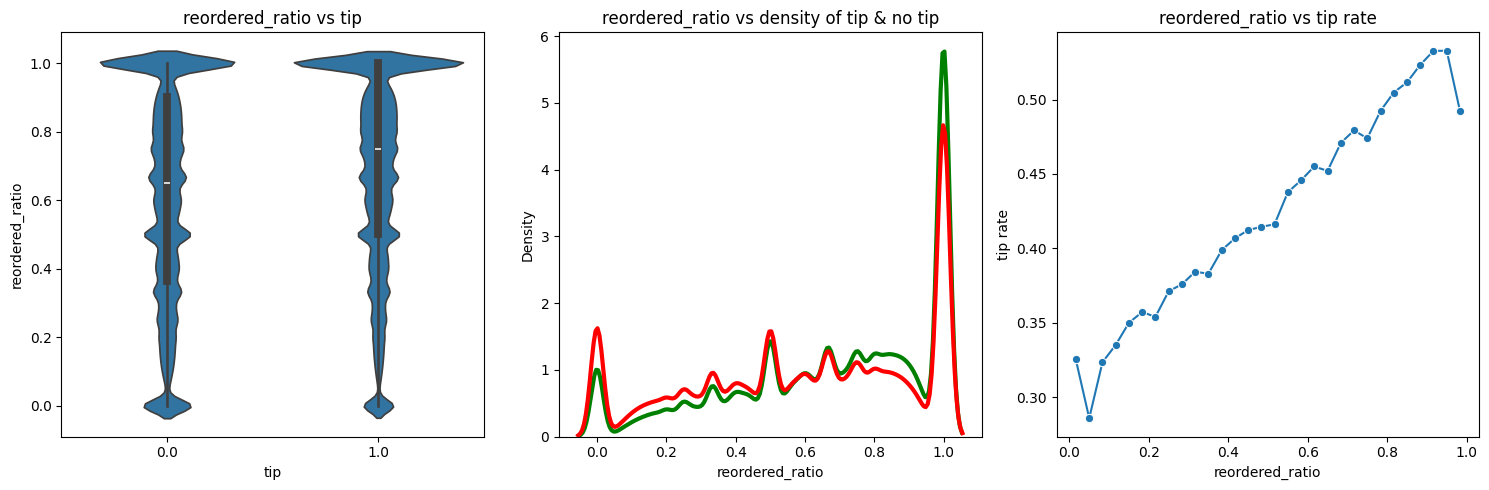

In [18]:
reordered_rate.analyze_feature(orders_tip_features)

##### **Previously Tipped Products Ratio (prev_tipped_products_ratio)**
**Description:** The feature represents the ratio of products in the current order that have been part of a previous order of the respective user for which the user has tipped. The previously tipped products ratio is calculated by dividing the number of products for which the user has tipped before by the total number of products in the current order. For example, a previously tipped products ratio of 0.5 means that for 50% of the products in the current order the user has tipped before at least once in his previous orders. This feature was created under the assumption that some users tip for the same products every time they order them. In contrast to the **product_tip_rate** this feature is user-specific and is supposed to capture the possible preference of the user for tipping only for specific products

**Analysis:** The feature has a correlation of around 0.3967 with the tip variable, which is very strong. The density plot on the left shows that the distribution of the previously tipped products ratio value is very different for tipped and not tipped orders. Whereas, the density of not tipped orders is very large at around 0-0.1, the density is bigger at higher values of the feature (around 0.9-1) for orders that have been tipped. The line graph on the right also shows that the tip probability increases very steeply with the previously tipped products ratio until around 0.1 and then increases very evenly with a smaller incline.

&rarr; **The feature will be included in the model's feature set due to its significant impact on tip probability.**

Correlation between prev_tipped_products_ratio and tip: 0.39669955439064053


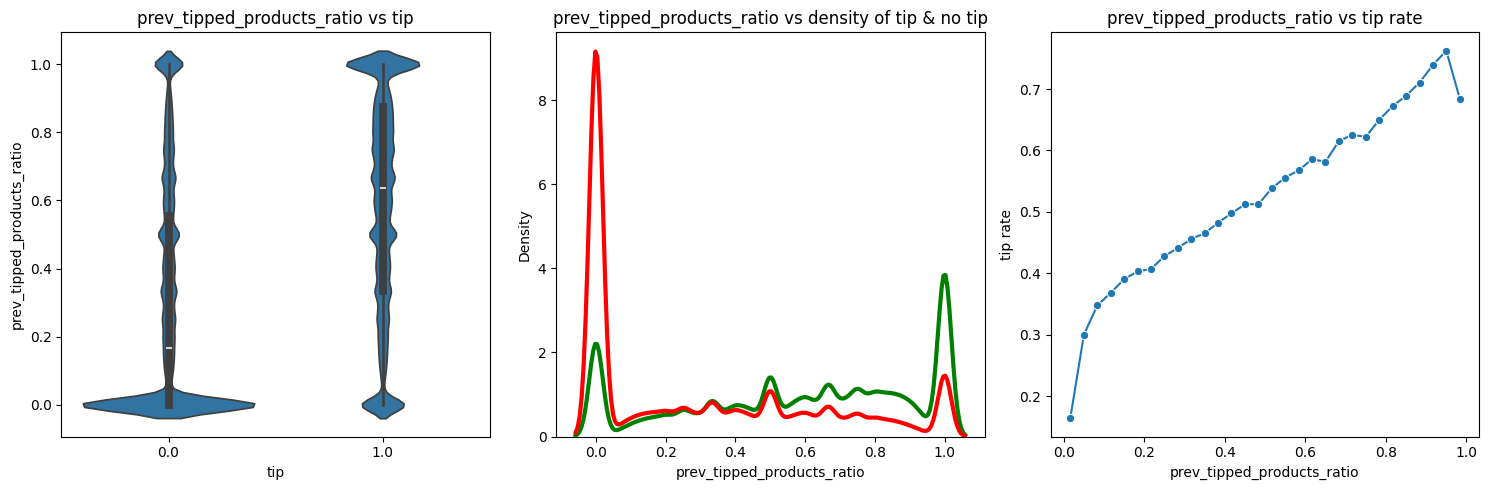

In [19]:
prev_tipped_products_ratio.analyze_feature(orders_tip_features)

##### **Contains Alcohol (contains_alcohol)**
**Description:** The feature encodes whether the order contains a product from the alcohol department or not. The feature is binary and is 1 if the order contains at least one product from the alcohol department and 0 if not. This feature was created because the tip probability of orders containing products from the alcohol department is significantly higher than the tip probability of orders containing products from other departments (as already shown in the analysis of the departments).

**Analysis:** The feature has a correlation of around 0.1212 with the tip variable, which is moderate/low. The bar chart shows that the tip probability is significantly higher when the order contains a product from the alcohol department (around 80%) compared to when it doesn't (around 42%). The low correlation can be explained by the fact that the values of the feature are not evenly distributed, as most orders do not contain products from the alcohol department. But as the bar chart shows, the feature has a significant impact on the tip probability.

&rarr; **The feature will be included in the model's feature set due to its significant impact on tip probability.**


Correlation between contains_alcohol and tip: 0.12116211100665403


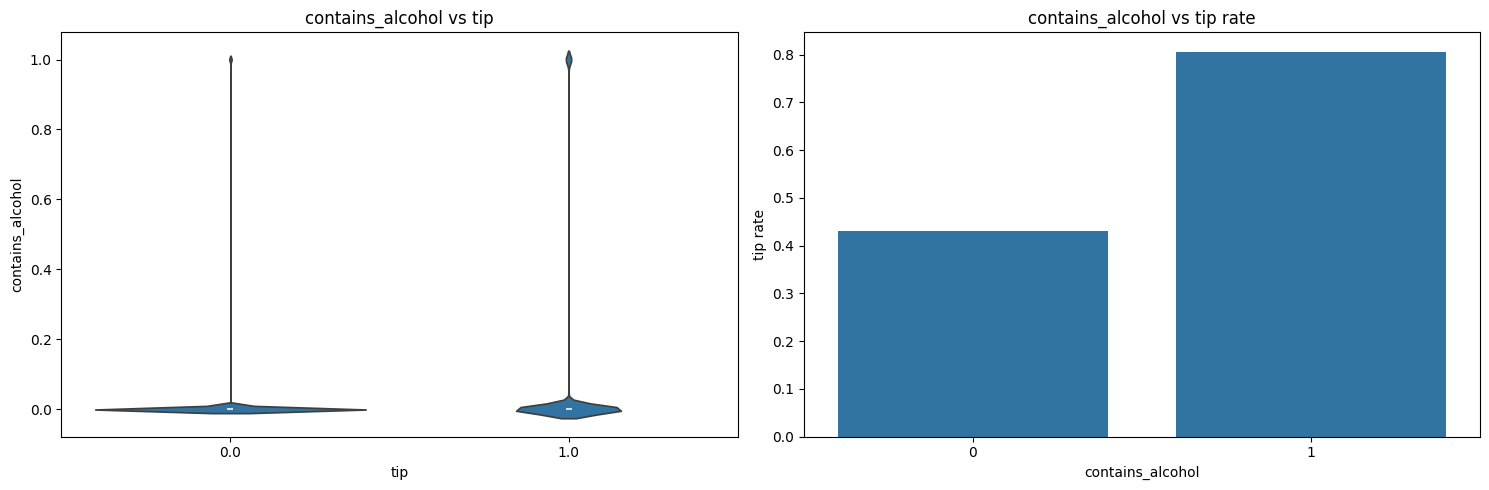

In [20]:
contains_alcohol.analyze_feature(orders_tip_features)

##### **Day of the Week with High Tip Probability (dow_high_tip_probability)**
**Description:** The feature encodes whether the order was placed on the days 0/1 (saturday/sunday) or not. The feature is binary and is 1 if the order was placed on day 0 or 1 and 0 if not. This feature was created because the tip probability is significantly higher on these days (as already shown in the analysis of the day of the week).

**Analysis:** The feature has a correlation of around 0.1405 with the tip variable, which is moderate/low. Like for the **contains_alcohol** feature, the correlation is not meaningful, because the values of the feature are not evenly distributed, as most orders are not placed on day 0 or 1. The bar chart shows, that the tip probability increases from around 40% to slightly above 50% when the order was placed on day 0 or 1, which is a moderate increase.

&rarr; **The feature will be included in the model's feature set due to its moderate impact on tip probability.**


Correlation between dow_high_tip_probability and tip: 0.1404633375663817


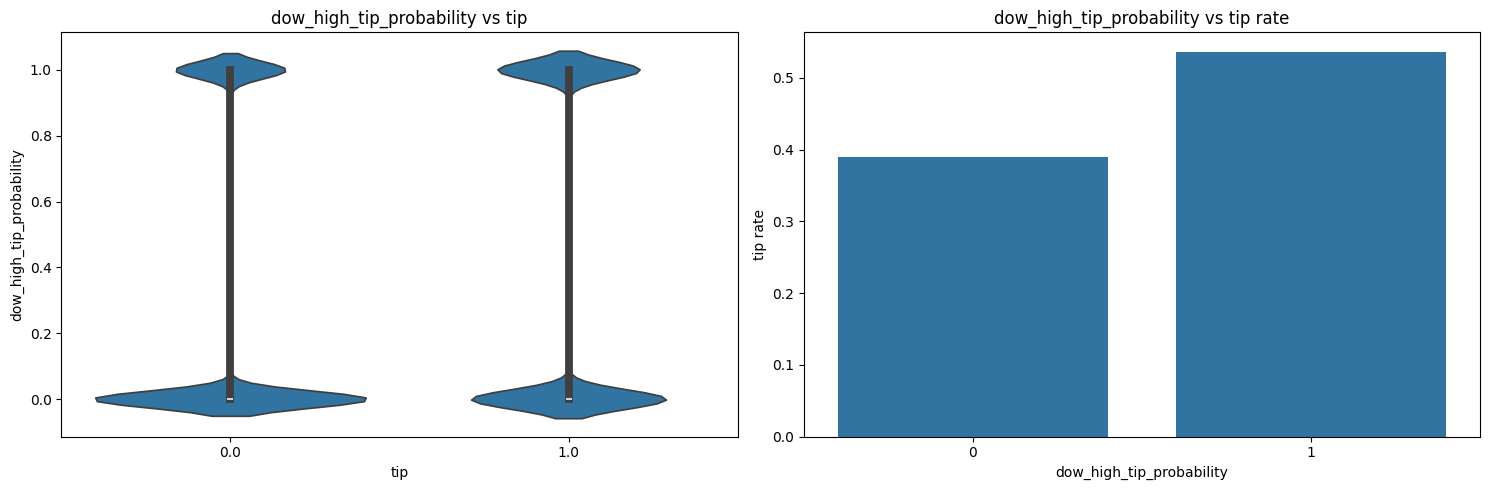

In [21]:
dow_high_tip_probability.analyze_feature(orders_tip_features)

##### **Hour of the Day with High Tip Probability (hod_high_tip_probability)**
**Description:** The feature encodes whether the order was placed in the hours 0-4 or 19-23 (7 p.m. until 12 a.m.) or not. The feature is binary and is 1 if the order was placed in this period and 0 if not. This feature was created because the tip probability is significantly higher in this period (as already shown in the analysis of the hour of the day).

**Analysis:** The feature has a correlation of around 0.0883, which is rather low. Again, the correlation is not meaningful and the bar chart shows that the tip probability increases by around 10-15% when the order was placed in this period. Therefore, the feature also has a moderate impact on the tip probability.

&rarr; **The feature will be included in the model's feature set due to its moderate impact on tip probability.**


Correlation between hod_high_tip_probability and tip: 0.0882580447369806


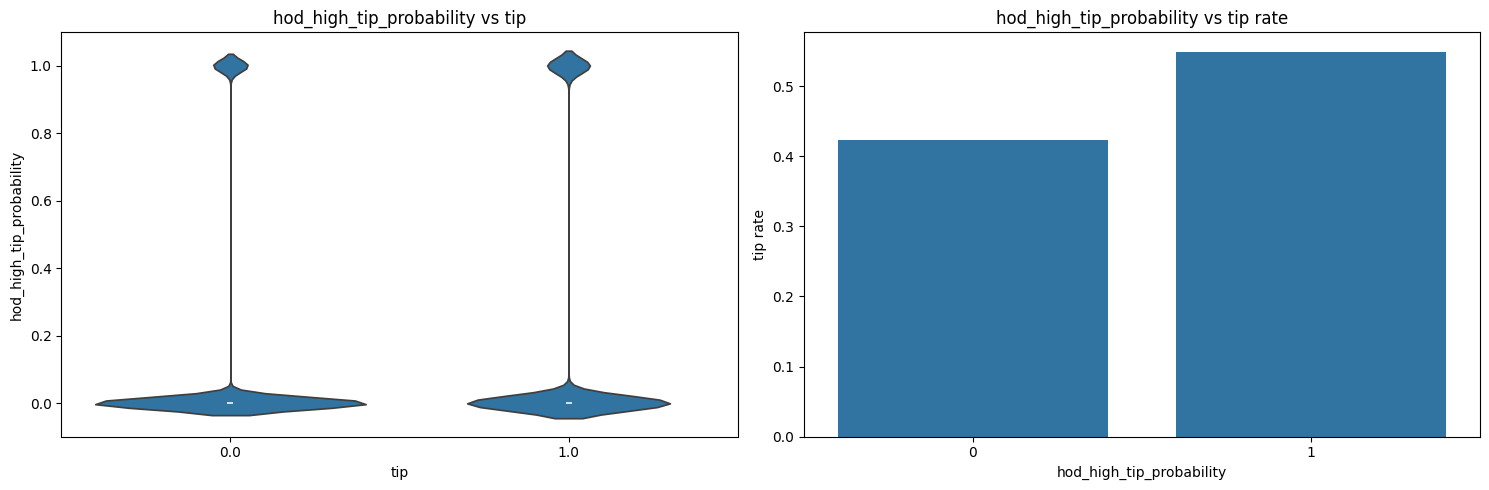

In [22]:
hod_high_tip_probability.analyze_feature(orders_tip_features)

##### **Order Number Squared (order_number_squared)**
**Description:** The feature represents the squared order number of the user. The order number squared is calculated by squaring the order number of the user. For example, an order number of 5 results in an order number squared of 25. This feature was created to capture the quadratic relationship between the order number and the tip probability, which was observed in the analysis of the order number.

**Analysis:** This feature can't be properly analyzed and interpreted on its own, because it was created to allow linear models to capture the quadratic relationship between the order number and the tip probability. This relationship can only be observed when the feature is combined with the original order number feature, which is why the correlation is not that meaningful.

&rarr; **The feature will be included in the model's feature set due to the observations made in the analysis of the order number.**


Correlation between order_number_squared and tip: 0.057032691250423394


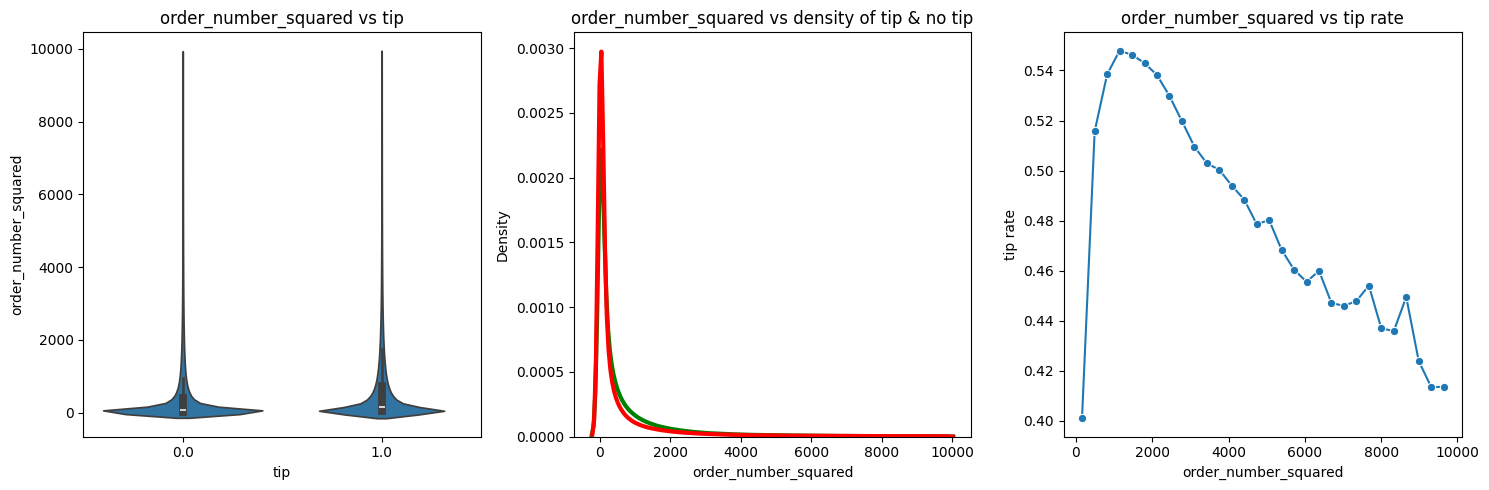

In [23]:
order_number_squared.analyze_feature(orders_tip_features)

##### **Department, Aisle, Product Tip Probability (department_tip_rate, aisle_tip_rate, product_tip_rate) - Dynamic Features**
**Description:** These three features represents the tip probability for a specific order in dependence of the departments, aisles and products that are part of the order. The feature computation, the specific department ( for feature aisle & product exactly the same way ) tip probabilities are calculated across all user with all the data that is available in the fold (dynamic feature). In order to assign a value to the order, the departments of the respective order are selected and the mean value of their tip probability is calculated.

**Analysis:** The three features have all an influence based on correlation and the order tip probability, but graph progression looks very similar. This is because they somehow represent the same context. There is a hierarchy between Departments, Aisles and Products. Within this context product is the most specific attribute whereas department is just more generalized.

&rarr; **Because of the similarity between these three features, just product_tip_rate will be part of the model's feature set due to the highest correlation and the degree of specialization**

Correlation between dept_tip_rate and tip: 0.23054140986216162


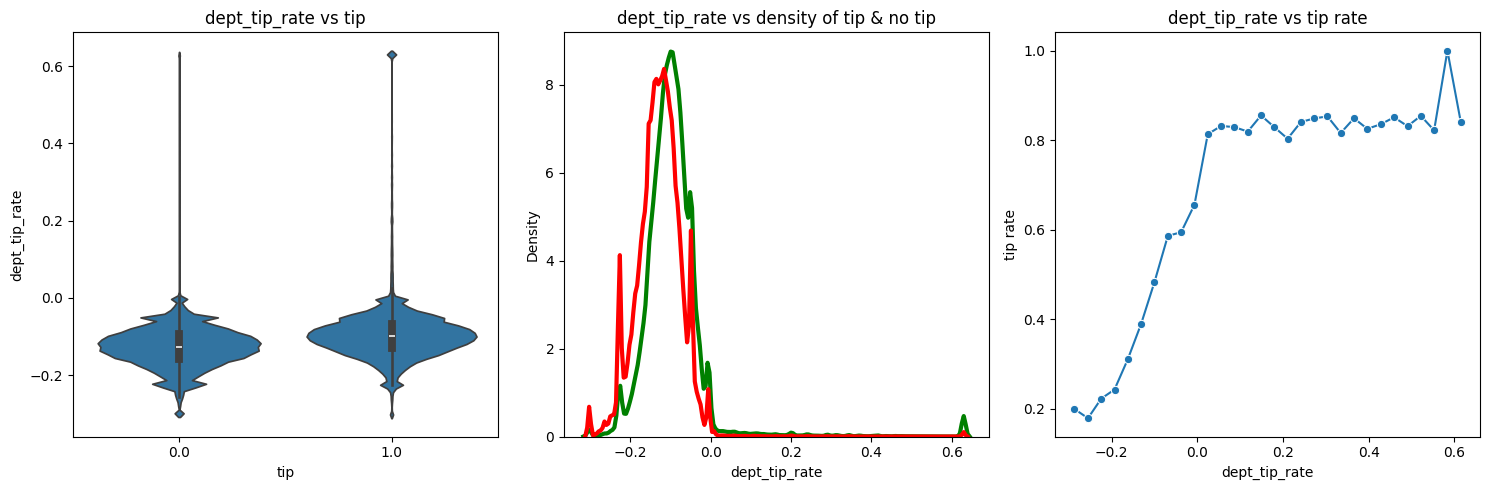

Correlation between aisle_tip_rate and tip: 0.24533379858053092


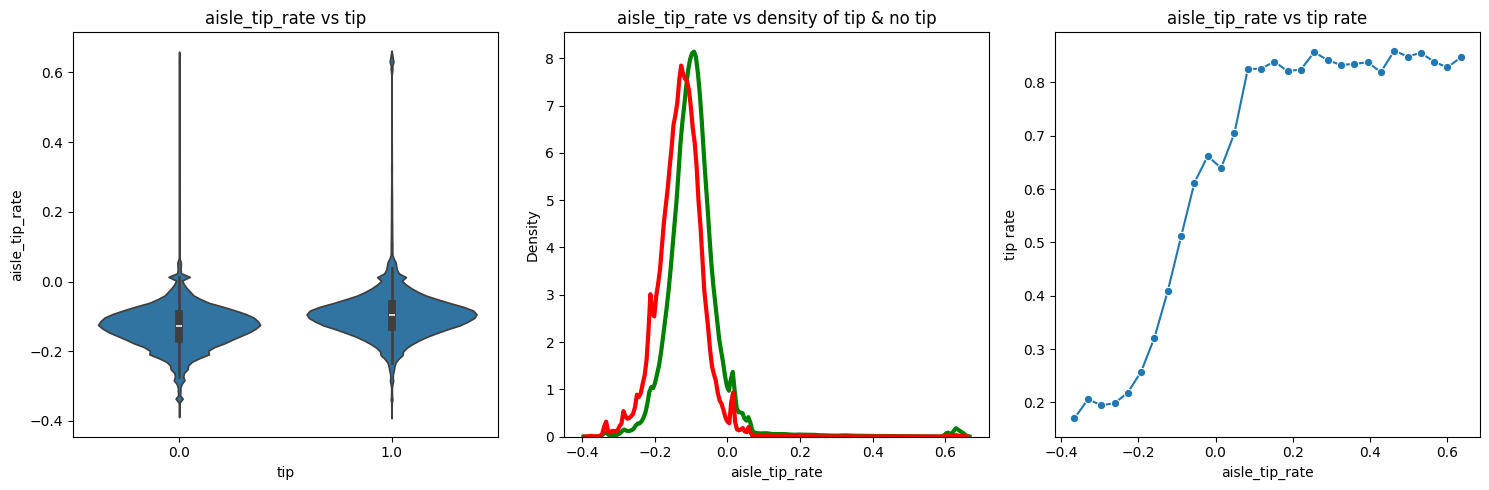

Correlation between product_tip_rate and tip: 0.2793736613452833


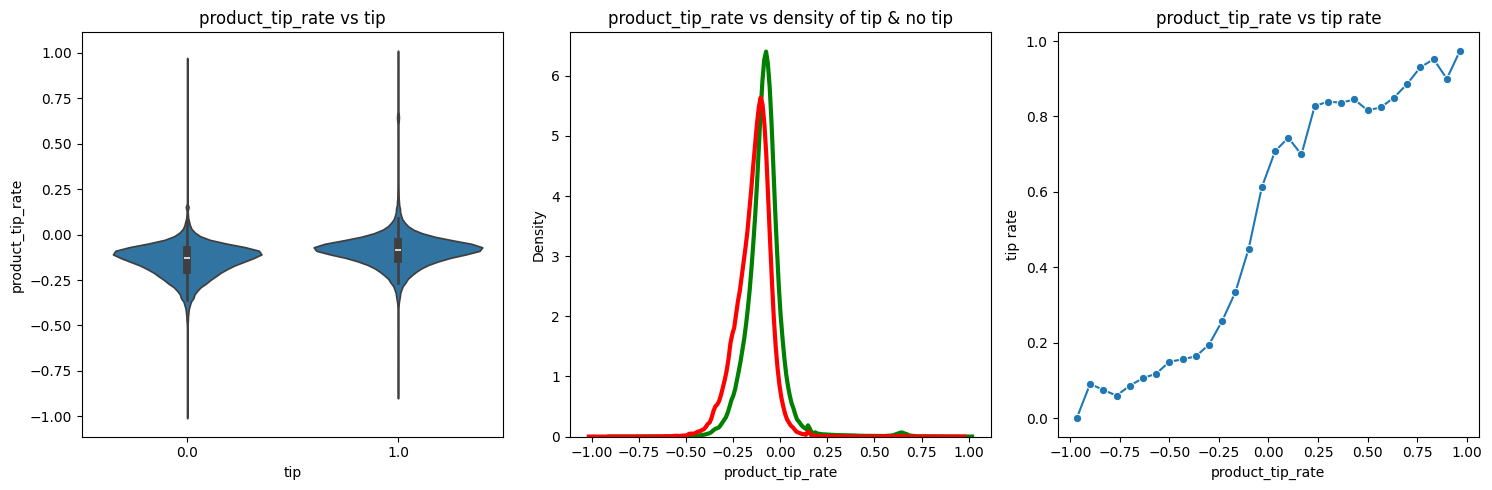

In [24]:
department_tip_rate.analyze_feature(orders_tip_features)
aisle_tip_rate.analyze_feature(orders_tip_features)
product_tip_rate.analyze_feature(orders_tip_features)  # TODO: Anpassen

##### **Order Frequency (order_frequency)**
**Description:** The feature represents the frequency with which a user places his/her orders. For the current order, the order frequency is calculated by the mean of the days since the prior order for all previous orders and the current order. For example, if the current order is the third order of the user, the second order was placed 15 days ago and the first order was placed 17 days before the second order. Then, the order frequency for the user's current order is (15 + 17) / 2 = 16 days. This feature was created under the assumption that the frequency of orders of a user influences his/her tipping behavior (e.g. regular users tip more often).

**Analysis:** The feature has a correlation of around -0.1928 with the tip variable, which is moderate/low. The line graph on the right shows that the tip probability first increases and then decreases with a higher order frequency. The plot in the middle shows that the decrease in the tip probability is encompassed by a decrease in the order density. This reduces the significance of the decreasing tip probabilities a little, but as the density is nowhere near zero, the relationship is still valid.

&rarr; **The feature will be included in the model's feature set due to its slight impact on tip probability.**

Correlation between order_frequency and tip: -0.19278865839358472


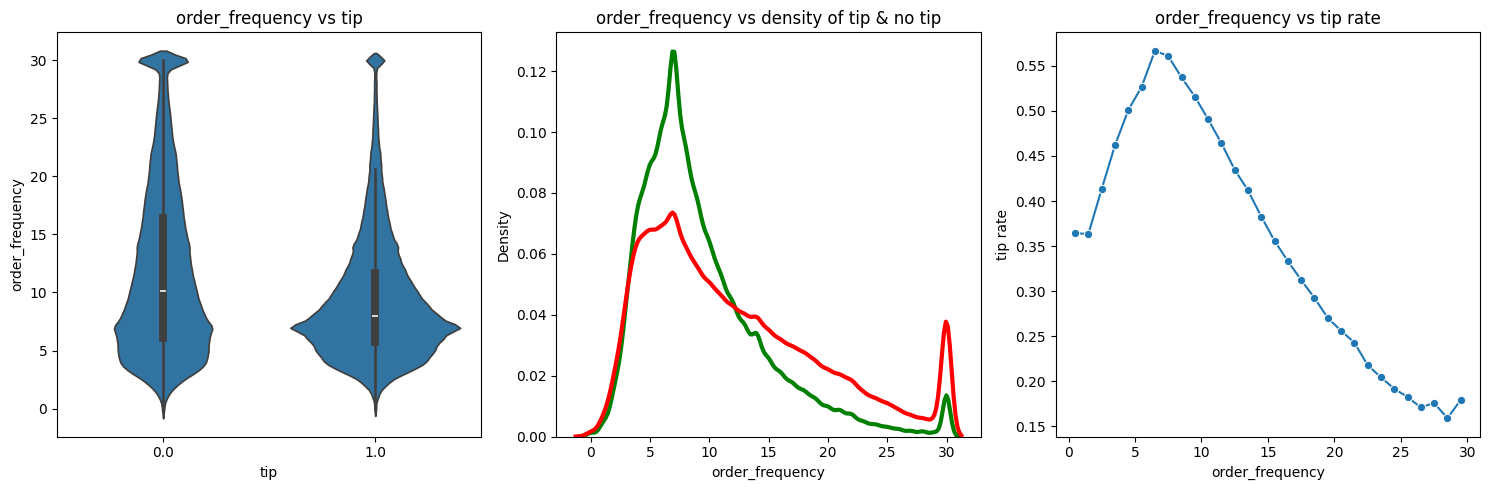

In [25]:
order_frequency.analyze_feature(orders_tip_features)

##### **Mean Ordered Rate (mean_ordered_rate)**
**Description:** The feature represents the similarity of an order of a user compared to his/her previous orders. For the current order, the relative frequency each contained product was previously ordered is computed. Then, the mean is taken across these relative frequencies. For example, if the current order is the third order of the user and it contains bananas and milk with relative frequencies of 2/3 and 1/3, respectively. Then, the mean ordered rate for the user's current order is (2/3 + 1/3) / 2 = 1/2. This feature was created under the assumption that the similarity of products in an order compared to previous orders influences the tipping behavior of a user (e.g. similar orders get tipped with a higher probability).

**Analysis:** The feature has a correlation of around 0.0582 with the tip variable, which is not very strong. The line graph on the right shows that the tip probability first increases and then fluctuates with a higher mean ordered rate. The plot in the middle shows that the fluctuation in tip probability is encompassed by a decrease in the order density. This distorts the relationship of an increasing mean ordered rate with the tip probability.

&rarr; **The feature will not be included in the model's feature set due to its low impact on tip probability.**

Correlation between mean_ordered_rate and tip: 0.0582331401303123


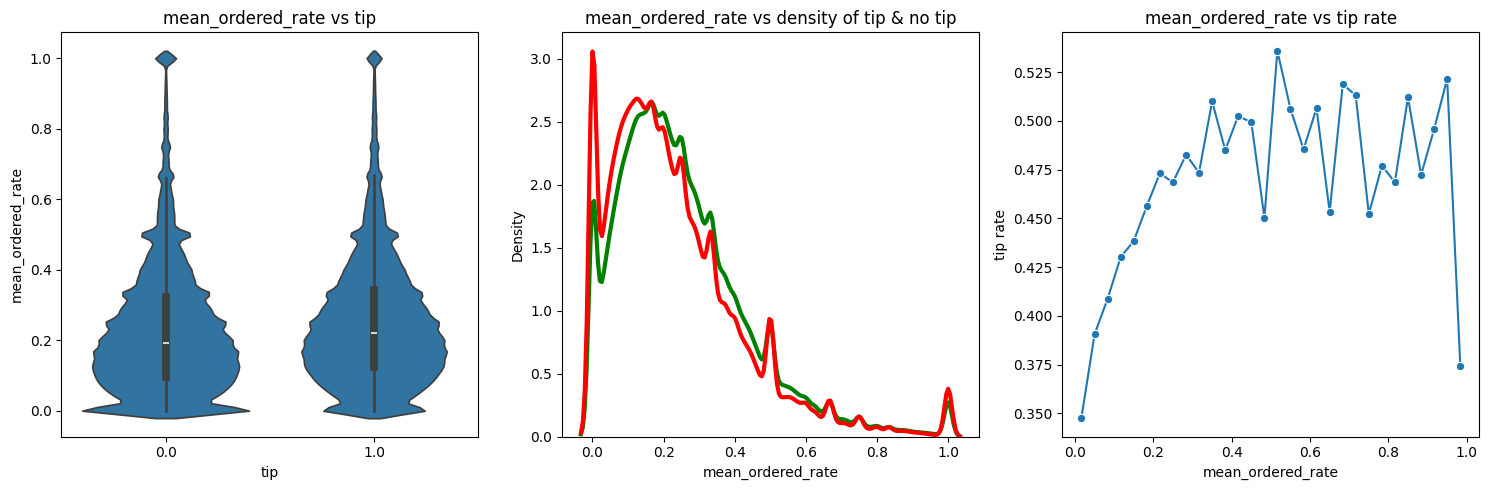

In [26]:
mean_ordered_rate.analyze_feature(orders_tip_features)

##### **Number of Days Since Tip (days_since_tip)**
**Description:** The feature represents the number of days since a user gave a tip for an order. For the current order, the days since a prior order that was tipped are summed up. For example, if the current order is the fourth order of the user, the days since the third order are 8, the days since the second order are 4, and the second order was tipped. Then, the days since tip are 8 + 4 = 12 for the current order. This feature was created under the assumption that the number of days a user gave his/her last tip influences the tip probability (e.g. the higher the number of days the user has not tipped, the lower the probability the he/she tips for the current order).

**Analysis:** The feature has a correlation of around -0.2971 with the tip variable, which seems to be significant for the tip probability. The line graph on the right shows a decreasing tip probability with an increasing number of days since the user gave his/her last tip.

&rarr; **The feature will be included in the model's feature set due to its significant impact on tip probability. However, only models that can handle NaNs can handle this feature, since it will be NaN if a user has never tipped before.**

Correlation between days_since_tip and tip: -0.2971071566114853


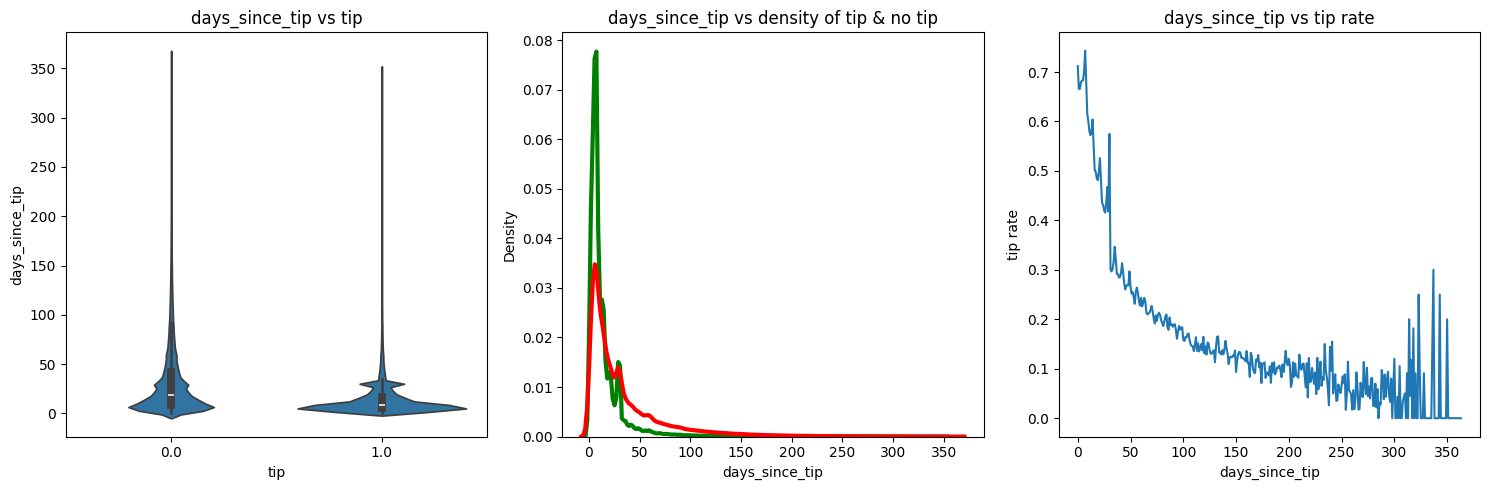

In [27]:
days_since_tip.analyze_feature(orders_tip_features)

##### **Relative Number of Days Since Tip (rel_days_since_tip)**
**Description:** The feature represents the number of days a tip is underdue/overdue for an order. For the current order, all previous orders are considered and the mean number of days between two orders that were tipped is computed. Then, for the current order, the number of days since a prior order that was tipped are summed up. As a result for the current order, this sum is deducted from the computed mean. Hence, if this difference is negative a tip is overdue and if this difference is positive a tip is underdue. For example, if the current order is the fourth order of the user, the first order was tipped, the second order was tipped after the next 5 days, the third order was tipped after the next 7 days, and the fourth order was placed after the next 7 days. Then, the sum of the number of days since a prior order was tipped is 7 days, since the third order was tipped and the fourth order was placed after the next 7 days. Moreover, the mean number of days between two orders that were tipped is (5 + 7) / 2 = 6 days. Then, a tip is overdue 1 day for the current (fourth) order, since 6 - 7 = -1. 

**Analysis:** The feature has a correlation of around -0.1205 with the tip variable, which is moderate/low. The line graph on the right together with the plot in the middle show that for the majority of orders, if a tip is due the tip probability is relatively high, while it decreases the more a tip becomes underdue and overdue.

&rarr; **The feature will be included in the model's feature set due to its slight impact on tip probability. However, only models that can handle NaNs can handle this feature, since it will be NaN if a user has never tipped twice before.**

Correlation between rel_days_since_tip and tip: -0.12045016545101256


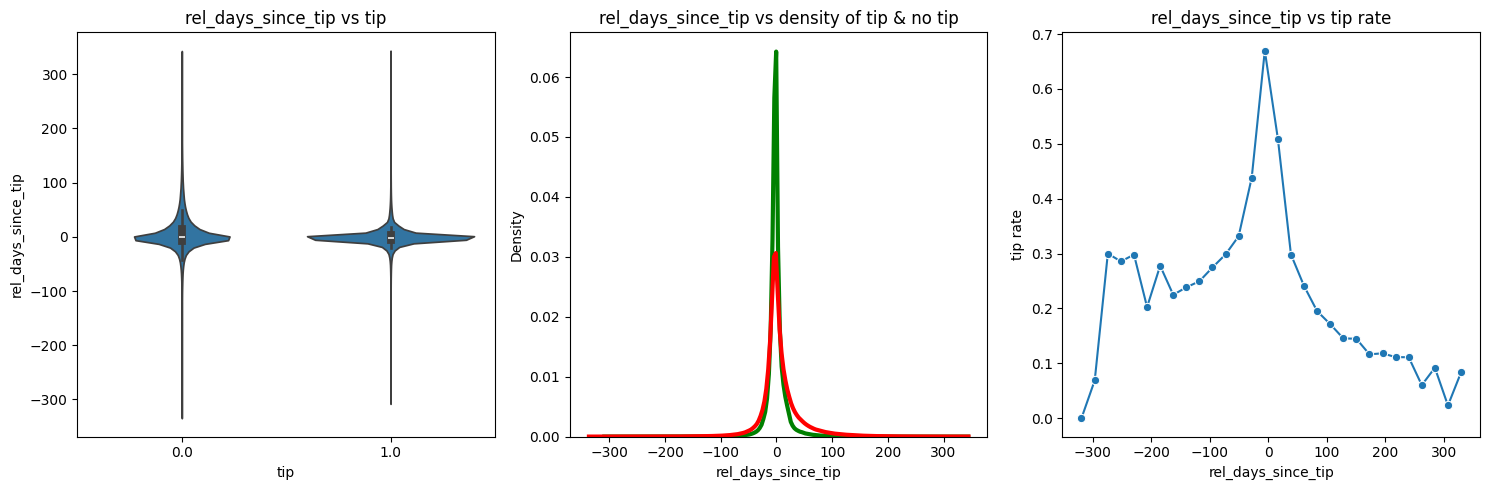

In [28]:
rel_days_since_tip.analyze_feature(orders_tip_features)

##### **Tip Probability based on Association Rules for Departments (tip_rate_assoc_rules_depts) - Dynamic Feature**
**Description:** The feature represents the tip probability based on the confidence of a matching association rule for an order. First, association rules are mined based on the FP-growth algorithm. For this, all orders across all users are used. The association rules are mined in a way such that the departments contained in an order represent a transaction. Additionally, a tip indicator is included in the transaction when the corresponding order was tipped. Then, the mined association rules are filtered such that the tip indicator is contained solely on the right-hand side and the corresponding departments are contained on the left-hand side of an association rule. For example, {produce, alcohol, snacks} -> {tip_indicator} with support = 5% and confidence = 65% could be a possible mined association rule.\
For the current order of a user, all mined association rules are searched such that the confidence (i.e. tip probability) of the association rule with the maximum subset on the right-hand side compared to the departments contained in the current order is used as a feature value.

**Analysis:** The feature has a correlation of around 0.0060 with the tip variable, which is very low. The line graph on the right shows that the tip probability first increases slightly and then fluctuates with a higher feature value. The plot in the middle shows that the fluctuation in tip probability is encompassed by a decrease in the order density. This distorts the relationship of an increasing feature value with the tip probability.

&rarr; **The feature will not be included in the model's feature set due to its low impact on tip probability.**

Correlation between tip_rate_assoc_rules_depts and tip: 0.006037174753102629


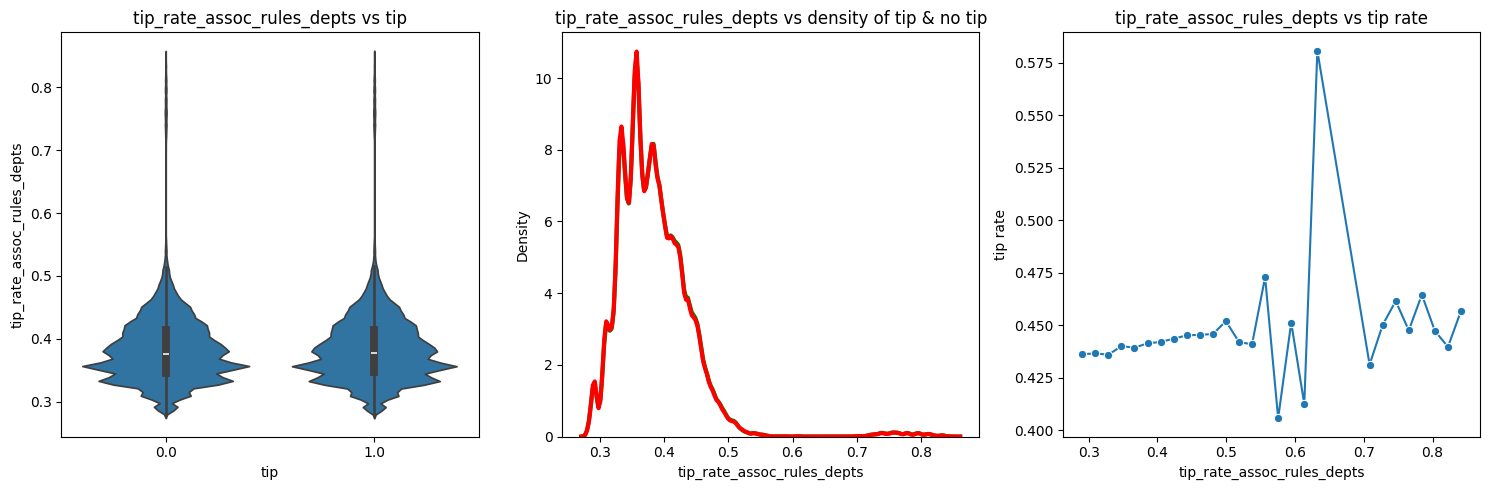

In [29]:
assoc_rules_departments.analyze_feature(orders_tip_features)

### Comparison of features

The comparison of all implemented features is based on correlations and regression coefficients. In the plots below describe the importance of features based on their correlations on the tip variable and the linear regression coefficients. All the features that were crafted have a different impact on the tip variable but with the knowledge of the overall analysis and the feature evaluation, some features can be categorized with the same label. 

- History of tip: tip_history, last_tip_sequence, 
- Alcohol products:
- Order Time: 
- Product tip rates:  

Based on the analysis of the features in the previous chapter, the following features were selected to be part of the model feature set. The decision is based on the analysis of the various plots, the correlation and the regression coefficients.

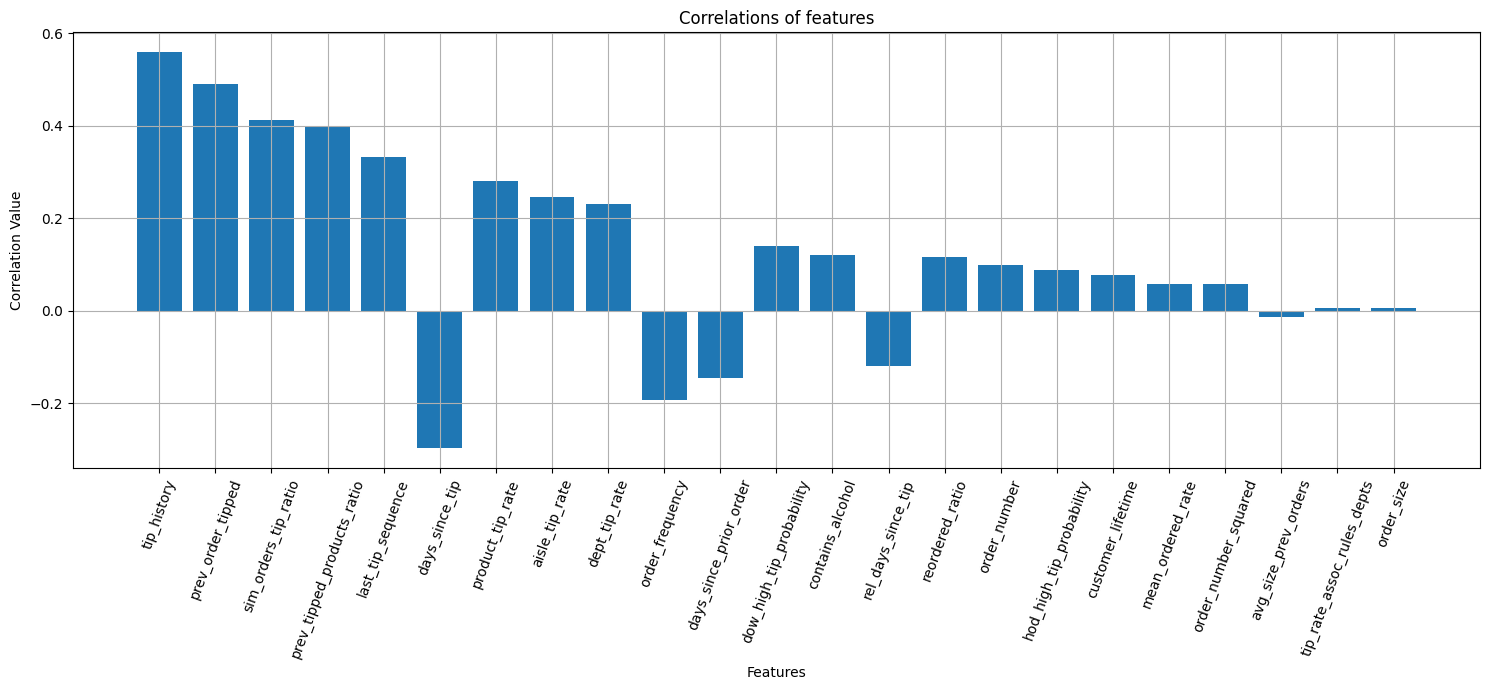

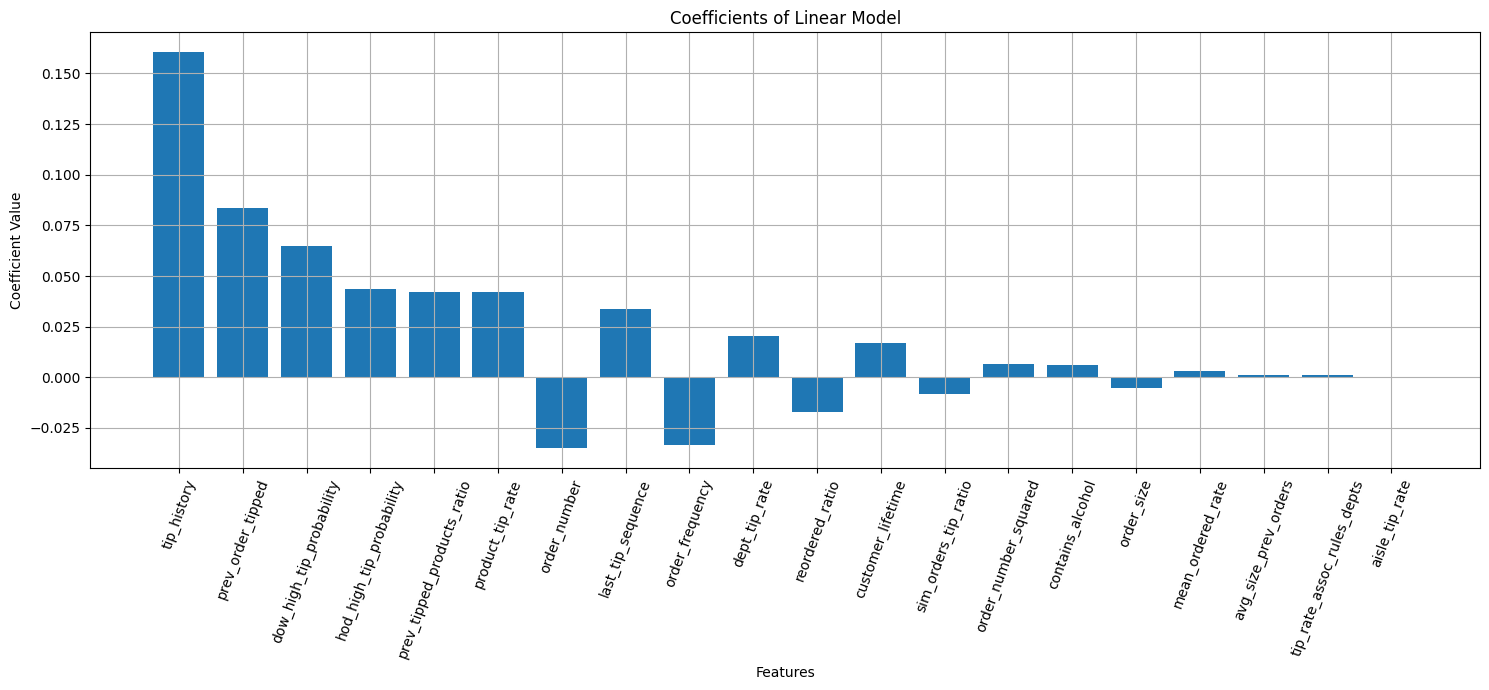

In [30]:
data_manager.calculate_feature_correlations()
data_manager.analyse_linear_regression_coefficients()

### Feature Selection
Based on the feature analysis different feature sets were created. The feature sets contain the features, for which a large enough impact on tipping was identified in the previous analysis. Only the features were almost no impact on tipping has been identified were excluded from the feature sets. Some features with a low impact were still included in the feature sets, to leave the decision to the model, whether they are actually useful or not.
The following feature sets were created:
- **Core Features:** Contains the core features, which can be used for all kinds of classifiers.
    - tip_history
    - prev_order_tipped
    - dow_high_tip_probability
    - hod_high_tip_probability
    - prev_tipped_products_ratio
    - product_tip_rate
    - order_number
    - last_tip_sequence
    - order_frequency
    - dept_tip_rate
    - reordered_ratio
    - customer_lifetime
    - sim_orders_tip_ratio
    - order_number_squared
    - contains_alcohol
    - days_since_prior_order # TODO:adjust placement
- **Ordinal Features:** Contains the ordinal features
    - order_dow
    - order_hour_of_day
- **Ordinal Features Replacement:** Contains the binary replacements for the ordinal features.
    - dow_high_tip_probability
    - hod_high_tip_probability
- **Features with NaN Values:** Contains all features, which contain many NaN values, because a tip is required to be present in the previous order history to calculate the feature.
    - rel_days_since_tip
    - days_since_tip

The following feature sets were created to be used for the different classes of classifiers:
- **Numerical-only Classifiers:** Contains the core features and the ordinal features replacements.
- **Numerical & Categorical Classifiers:** Contains the core features, the ordinal features and the features with NaN values, as decision trees can handle these values.

In [1]:
features_core = ['tip_history', 'prev_order_tipped', 'prev_tipped_products_ratio', 'product_tip_rate', 'order_number',
                 'last_tip_sequence', 'order_frequency', 'dept_tip_rate', 'reordered_ratio', 'customer_lifetime',
                 'sim_orders_tip_ratio', 'order_number_squared', 'contains_alcohol', 'days_since_prior_order']

features_ordinal = ['order_dow', 'order_hour_of_day']
features_ordinal_replacement = ['dow_high_tip_probability', 'hod_high_tip_probability']
features_with_na = ['rel_days_since_tip', 'days_since_tip']

features_numeric = features_core + features_ordinal_replacement
features = features_core + features_ordinal + features_with_na

## Model Training
The model training consists of several steps and components:
- **Cross-Validation:** A custom user-based time-series cross-validation strategy is used to split the data into training and test sets.
- **Training Pipeline:** For the hyperparameter tuning and the model training a pipeline is used, which is executed each fold of the cross-validation.
    - **Dataset Selection:** A custom dataset selector is used which selects a pre-calculated dataset for the respective fold (avoids re-calculating dynamic features each fold). 
    - **Feature Scaling:** Depending on the model type, the features are scaled by a standard scaler.
    - **Classifier:** The last step of the pipeline is the classifier, which is trained on the training data and used to predict the tip of the test data of the respective fold.
- **Hyperparameter Tuning:** For hyperparameter tuning, a grid search is used, which tests different hyperparameter combinations and selects the best one based on a scoring metric. The grid search executes the training pipeline for each hyperparameter combination and each fold of the cross-validation.
- **Model Parameters:** The best hyperparameters are used in the notebook for faster execution. The parameters used for the grid search are commented out in the notebook for transparency.

In [ ]:
from data_management.cross_validation import LastOrderUserTSCVSplitter
from data_management import DatasetSelector

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

Since many features, such as "tip_history," depend on a user's order history, they frequently contain NaN values for a user's initial order. Consequently, the first order from each user is excluded from the dataset, since they provide little value to the model and would require additional handling to impute the missing values.


In [ ]:
data_manager.remove_first_orders()
orders_tip_test = data_manager.get_orders_tip_test().copy()
orders_tip_train = data_manager.get_orders_tip_train().copy()

### Cross-Validation
To avoid data leakage, 2 custom user-based time-series cross-validation strategies were implemented:
- **LastOrderUserTSCVSplitter:** This splitter splits the data based on the last order of each user. The most recent order of each user is used as test data, while all previous orders are used as training data. The test data of each fold is removed in all subsequent folds.
- **UserTSCVSplitter:** This splitter uses a defined ratio of the most recent orders of each user as test data and the remaining orders as training data. For example, if the ratio is set to 0.2 and a user has 10 orders, the last 2 orders are used as test data and the first 8 orders are used as training data. The test data of each fold is removed in all subsequent folds. If it does not work out exactly (e.g. a user with 9 orders), then orders are selected probabilistically. For example, for a user with 9 orders and a ratio of 0.2, 1.8 orders should be selected. In this case the last order is selected, and the second last order is selected with a probability of 0.8. Also, the current size of the respective fold is used as reference for the selection, which means that the ratio of test and training data remains constant (e.g. 80:20).

Then number of folds for the cross-validation was set to 5,to limit the computational effort and to ensure that the model is trained on a sufficient amount of data.
After some tests, it was decided to use **LastOrderUserTSCVSplitter** for the model training, because it is more similar to the final prediction task, as only the tip for last orders must be predicted.

The splitter splits the training data into 5 folds and re-calculates the dynamic features for each fold, to avoid data leakage. To incorporate the information of the first orders, without using them for training, the first orders are added for the calculation of the dynamic features and are removed again afterward. The prepared splits are then exported to the local file system, to avoid re-calculating them each time.


In [ ]:
# Uncomment the second line to re-calculate the splits if necessary (this will take a long time)

last_order_user_tscv_splitter = LastOrderUserTSCVSplitter(data_manager, n_splits=5)
# last_order_user_tscv_splitter.export_splits('data/prepared_data/')

In [ ]:
# Uncomment the next lines to use the UserTSCVSplitter instead (this will take a long time)

# user_tscv_splitter = UserTSCVSplitter(data_manager, n_splits=5, validation_set_ratio=0.2, seed=42)
# user_tscv_splitter.export_splits('data/prepared_data/')

###  Classifiers (Numerical-only)

The following classifiers, which only support numerical features, were selected for the model training:
- **Logistic Regression**
- **Multi-Layer Perceptron**
- **Gaussian Naive Bayes**

The data is prepared using only the feature set for the numerical-only classifiers.


The custom splitter imports the prepared splits from the local file system and provides the splits as dictionary, where the indices of all orders of the respective fold are hashed and used as keys. In the pipeline, the dataset selector then exchanges the dataset of the current fold with the respective prepared fold by hashing the indices of dataset in the current fold and retrieving the corresponding prepared fold from the dictionary. This way the correct dataset is selected for each fold. This dataset selector is needed as a workaround to dynamically exchange the dataset, because sklearn only allows custom splitters to return indices and not the actual data.


In [ ]:
prepared_splits_numeric = last_order_user_tscv_splitter.import_splits('data/prepared_data/', features_numeric)
X_num = orders_tip_train[features_numeric]
y_num = orders_tip_train['tip'].astype(bool)

#### Logistic Regression

The logistic regression model is trained using the numerical-only feature set. The hyperparameters are tuned using a grid search with 5-fold cross-validation. The hyperparameters that are tuned are the regularization parameter C and the solver as well as the maximum iterations. The best hyperparameters are selected based on the accuracy score. The best hyperparameters reached a mean accuracy of 0.802477 and a top accuracy of 0.813330.

The logistic regression is based on the regression of a linear function, which is then transformed into a probability using the logistic function. The model is used to predict the probability of a tip based on the input features. It was interesting to observe the coefficients of the logistic regression, as they provide information about the importance of the features for the prediction. The model is simple and easy to use but lacks a little in comparison to more complex models like neural networks and XGboost.

In [ ]:
from sklearn.linear_model import LogisticRegression
from data_management import eval_logreg
from data_management import get_best_cv_scores

pipeline_steps = [('selector', DatasetSelector(prepared_splits_numeric)),
                  ('scaler', StandardScaler()),
                  ('logreg', LogisticRegression())]

pipeline = Pipeline(pipeline_steps, verbose=False)

# param_grid = {
#     'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'logreg__solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
# } -> Mean: 0.802477 Top: 0.813330
param_grid = {
    'logreg__max_iter': [1000],
    'logreg__C': [0.001],
    'logreg__solver': ['sag'],
}

grid_search_clf_log = GridSearchCV(pipeline, param_grid, cv=last_order_user_tscv_splitter, scoring='accuracy',
                                   verbose=1,
                                   n_jobs=5, return_train_score=True)
grid_search_clf_log.fit(X_num, y_num)

In [ ]:
eval_logreg(grid_search_clf_log, features_numeric)

In [ ]:
scores_log = get_best_cv_scores(grid_search_clf_log)
scores_log

#### Multi-Layer Perceptron

The multi-layer perceptron model is trained using the numerical-only feature set. The hyperparameters are tuned using a grid search with 5-fold cross-validation. The hyperparameters that are tuned are the hidden layer sizes, the activation function, the regularization parameter alpha and the maximum number of iterations. The best hyperparameters are selected based on the accuracy score. The best hyperparameters reached a mean accuracy of 0.803884 and a top accuracy of 0.814843.

The multi-layer perceptron is a feedforward neural network, which consists of multiple layers of nodes. The model is able to capture non-linear relationships between the features, which can be an advantage compared to linear models like logistic regression. For the hyperparameter tuning we choose to keep it simple with few layers and nodes, as the dataset is not very large and complex. The model had a good performance and was able to capture the relationships between the features well. It is a good choice for the prediction of the tip probability and is a contender for the best model for the prediction task.

In [ ]:
from sklearn.neural_network import MLPClassifier

pipeline_steps = [('selector', DatasetSelector(prepared_splits_numeric)),
                  ('scaler', StandardScaler()),
                  ('mlp', MLPClassifier())]

pipeline = Pipeline(pipeline_steps, verbose=False)

# param_grid = {
#     'mlp__hidden_layer_sizes': [(10,), (50,), (100,), (5, 5), (10, 10), (25, 25)],
#     'mlp__activation': ['relu'],
#     'mlp__alpha': [0.001, 0.01, 0.1],
#     'mlp__max_iter': [100, 500, 750]
# } -> Top: 0.814843, Mean: 0.803884

param_grid = {'mlp__activation': ['relu'],
              'mlp__alpha': [0.01],
              'mlp__hidden_layer_sizes': [(25, 25)],
              'mlp__max_iter': [750]}

grid_search_clf_mlp = GridSearchCV(pipeline, param_grid, cv=last_order_user_tscv_splitter, scoring='accuracy',
                                   verbose=1,
                                   n_jobs=5, return_train_score=True)
grid_search_clf_mlp.fit(X_num, y_num)

In [ ]:
scores_mlp = get_best_cv_scores(grid_search_clf_mlp)
scores_mlp

### Gaussian Naive Bayes

The Gaussian Naive Bayes model is trained using the numerical-only feature set. The hyperparameters are tuned using a grid search with 5-fold cross-validation. The hyperparameters that are tuned is the variation smoothing parameter. The best hyperparameters are selected based on the accuracy score. The best hyperparameters reached a mean accuracy of 0.784138.

The Gaussian Naive Bayes model is based on Bayes' theorem and assumes that the features are independent. The first time the model was trained, it had the worst performance of all models so far. This lead to excluding the model from further analysis, as it seems that the model is not able to capture the relationships between the features well.

In [ ]:
from sklearn.naive_bayes import GaussianNB

pipeline_steps = [('selector', DatasetSelector(prepared_splits_numeric)),
                  ('scaler', StandardScaler()),
                  ('nb', GaussianNB())]

pipeline = Pipeline(pipeline_steps, verbose=False)
# param_grid = {
#     'nb__var_smoothing': [1e-9, 1e-10, 1e-11]
# } -> Mean: 0.784138
param_grid = {
    'nb__var_smoothing': [1e-9]  # Variation smoothing parameter
}

grid_search_clf_bayes = GridSearchCV(pipeline, param_grid, cv=last_order_user_tscv_splitter, scoring='accuracy',
                                     verbose=1,
                                     n_jobs=5, return_train_score=True)
grid_search_clf_bayes.fit(X_num, y_num)

In [ ]:
scores_bayes = get_best_cv_scores(grid_search_clf_bayes)
scores_bayes

### Classifiers (Numerical & Categorical)
The following classifiers, which support numerical and categorical features, were selected for the model training:
- **Decision Tree**
- **XGBoost**

The data is prepared using only the feature set for the classifiers, that can handle numerical and categorical features.

In [ ]:
prepared_splits = last_order_user_tscv_splitter.import_splits('data/prepared_data/', features)
X = orders_tip_train[features]
y = orders_tip_train['tip'].astype(bool)

### Decision Tree

The decision tree model is trained using the feature set, which contains numerical and categorical features. Furthermore, the features were not scaled because it is not necessary for a Decision Tree. The hyperparameters are tuned using a grid search with 5-fold cross-validation. The hyperparameters that are tuned are the criterion, the maximum depth and the minimum samples leaf. The best hyperparameters are selected based on the accuracy score. The best hyperparameters reached a mean accuracy of 0.802.

The decision tree model is a tree-like model, which splits the data based on the features to predict the target variable. The model is able to capture non-linear relationships between the features and is straightforward to interpret. Compared to the XGBoost model, the decision tree model is less complex and has a lower performance, which is why we decided to prioritize the XGBoost model for the prediction task.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

pipeline_steps = [('selector', DatasetSelector(prepared_splits)),
                  ('decision_tree', DecisionTreeClassifier())]

pipeline = Pipeline(pipeline_steps, verbose=False)

# param_grid = {
#     'decision_tree__criterion': ['entropy'],
#     'decision_tree__max_depth': [2 ** i for i in range(5, 15)],
#     'decision_tree__min_samples_leaf': [2 ** i for i in range(5, 20)]
# }

param_grid = {
    'decision_tree__criterion': ['entropy'],
    'decision_tree__max_depth': [10],
    'decision_tree__min_samples_leaf': [500]
}

grid_search_clf_dtree = GridSearchCV(pipeline, param_grid, cv=last_order_user_tscv_splitter, scoring='accuracy',
                                     verbose=1,
                                     n_jobs=5, return_train_score=True)
grid_search_clf_dtree.fit(X, y)

In [ ]:
scores_dtree = get_best_cv_scores(grid_search_clf_dtree)
scores_dtree

### XGBoost

The XGBoost model is trained using the feature set, which contains numerical and categorical features. Furthermore, the features were not scaled because it is not necessary for a XGBoost Decision Tree. The hyperparameters are tuned using a grid search with 5-fold cross-validation. The hyperparameters that are tuned are the number of estimators, the maximum depth, the learning rate and the subsample. The best hyperparameters are selected based on the accuracy score. The best hyperparameters reached a mean accuracy of 0.805.

The XGBoost model is an ensemble learning method, which is based on decision trees. The model is able to capture non-linear relationships between the features and is known for its high performance. The model is more complex than the decision tree model and is able to capture the relationships between the features better. The XGBoost model is a good choice for the prediction of the tip probability and is a contender for the best model for the prediction task. Furthermore, it reached the highest mean accuracy of all models so far and is preferred for the final prediction task.

In [ ]:
from xgboost import XGBClassifier

pipeline_steps = [('selector', DatasetSelector(prepared_splits)),
                  ('xgb', XGBClassifier(use_label_encoder=False))]

pipeline = Pipeline(pipeline_steps, verbose=False)

# param_grid = {'xgb__n_estimators': [2 ** i for i in range(2, 8)],
#               'xgb__max_depth': [2 ** i for i in range(2, 8)],
#               'xgb__learning_rate': [0.01, 0.1],
#               'xgb__subsample': [0.4, 0.6, 0.8]}
#               -> Mean: 0.805 

param_grid = {
    'xgb__learning_rate': [0.1],
    'xgb__max_depth': [5],
    'xgb__n_estimators': [100],
    'xgb__subsample': [0.6]
}

grid_search_clf_xgboost = GridSearchCV(pipeline, param_grid, cv=last_order_user_tscv_splitter, scoring='accuracy',
                                       verbose=1,
                                       n_jobs=1, return_train_score=True)
grid_search_clf_xgboost.fit(X, y)

In [ ]:
scores_xgboost = get_best_cv_scores(grid_search_clf_xgboost)
scores_xgboost

## Accuracy Prediction
The prediction of the accuracy, which is expected to be achieved by the best model for the test set, is done using the accuracy scores, which have been calculated during the cross-validation. 

By looking at the scores of the different folds, one recognizes that each fold the accuracy test score decreases. This can be explained by the custom time-series cross-validation strategy. Because the most recent order of each user is used as test data only once and is then removed in all subsequent folds, the model is trained on less data each fold, which can lead to a decrease in accuracy. Additionally, the order history of each user becomes shorter with each fold. Because many features are computed based on the order history of the respective user, the features of the test data become less informative with each fold, which is why the model's predictions, based on these features, become less accurate. Following this logic, the accuracy of the model for the test set should be higher than the accuracy scores of the first fold. The reason for this is that the model is trained on the entire dataset and the features of the test data are more informative, since the order history of each user contains 1 order more than in the first fold.

Therefore, a linear regression model is fitted to the accuracy scores of the different folds to model the relationship between the length of the order history and the accuracy score. The regression model is then used to predict the accuracy of the classifier for the test set. The visualization shows that the model's accuracy increases linearly with the length of the order history. Therefore, it seems reasonable to predict the accuracy of the model for the test set by following this trend using the linear regression model.

In the plot below, the accuracy scores of the train (blue) and test (orange) data are shown for each fold. The estimated accuracy of the model for the final test set is depicted in green.

**Note**: It can be observed, that the accuracy for the test set is higher than the accuracy of the train set, which is unusual. A possible explanation for this could be that it's easier for the model to predict the tip for the test set, because there is a longer order history, based on which the features are calculated. The train set on the other hand contains more orders, with a shorter history (e.g. order 2,3,4), which makes the features of these orders less informative and the prediction more difficult.


In [ ]:
from data_management import estimate_accuracy

accuracy_log = estimate_accuracy(grid_search_clf_log)
accuracy_log

In [ ]:
accuracy_mlp = estimate_accuracy(grid_search_clf_mlp)
accuracy_mlp

In [ ]:
accuracy_bayes = estimate_accuracy(grid_search_clf_bayes)
accuracy_bayes

In [ ]:
accuracy_dtree = estimate_accuracy(grid_search_clf_dtree)
accuracy_dtree

In [ ]:
accuracy_xgboost = estimate_accuracy(grid_search_clf_xgboost)
accuracy_xgboost

## Tip Prediction

The best model is used to predict the tip for the test set.

In [ ]:
# TODO: Select best model
best_estimator = grid_search_clf_xgboost.best_estimator_
X_test = orders_tip_test[features]
y_pred = best_estimator.predict(X_test)

orders_tip_test['tip'] = y_pred
orders_tip_test['tip'].value_counts()

orders_tip_test_csv = pd.merge(tip_test.drop('tip', axis=1), orders_tip_test[['order_id', 'tip']], on='order_id',
                               how='left')
orders_tip_test_csv.rename(columns={tip_test.columns[0]: ''}, inplace=True)
orders_tip_test_csv

The predicted tip for the test set is saved as a CSV file and exported to the local file system.

In [ ]:
orders_tip_test_csv.to_csv(os.path.join(DATA_DIR, 'submission.csv'), index=False)